In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("WorldCups.csv")

In [3]:
df.head(10)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


In [4]:
df.tail(5)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2.785.100
16,2002,Korea/Japan,Brazil,Germany,Turkey,Korea Republic,161,32,64,2.705.197
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3.359.439
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145,32,64,3.178.856
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [6]:
df.shape

(20, 10)

In [7]:
for i, m in enumerate (df.columns):
    print(i+1,'-', m)

1 - Year
2 - Country
3 - Winner
4 - Runners-Up
5 - Third
6 - Fourth
7 - GoalsScored
8 - QualifiedTeams
9 - MatchesPlayed
10 - Attendance


### CHECKING FOR MISSING AND NULL VALUES

In [8]:
df.isnull().sum().any()

False

### ANALYZING THE COUNTRY COLUMN

In [9]:
df['Country'].unique()

array(['Uruguay', 'Italy', 'France', 'Brazil', 'Switzerland', 'Sweden',
       'Chile', 'England', 'Mexico', 'Germany', 'Argentina', 'Spain',
       'USA', 'Korea/Japan', 'South Africa'], dtype=object)

In [10]:
df['Country'].value_counts()

Italy           2
France          2
Brazil          2
Mexico          2
Germany         2
Uruguay         1
Switzerland     1
Sweden          1
Chile           1
England         1
Argentina       1
Spain           1
USA             1
Korea/Japan     1
South Africa    1
Name: Country, dtype: int64

In [11]:
df.groupby('Country')['Attendance'].unique()

Country
Argentina                  [1.545.791]
Brazil          [1.045.246, 3.386.810]
Chile                        [893.172]
England                    [1.563.135]
France            [375.700, 2.785.100]
Germany         [1.865.753, 3.359.439]
Italy             [363.000, 2.516.215]
Korea/Japan                [2.705.197]
Mexico          [1.603.975, 2.394.031]
South Africa               [3.178.856]
Spain                      [2.109.723]
Sweden                       [819.810]
Switzerland                  [768.607]
USA                        [3.587.538]
Uruguay                      [590.549]
Name: Attendance, dtype: object

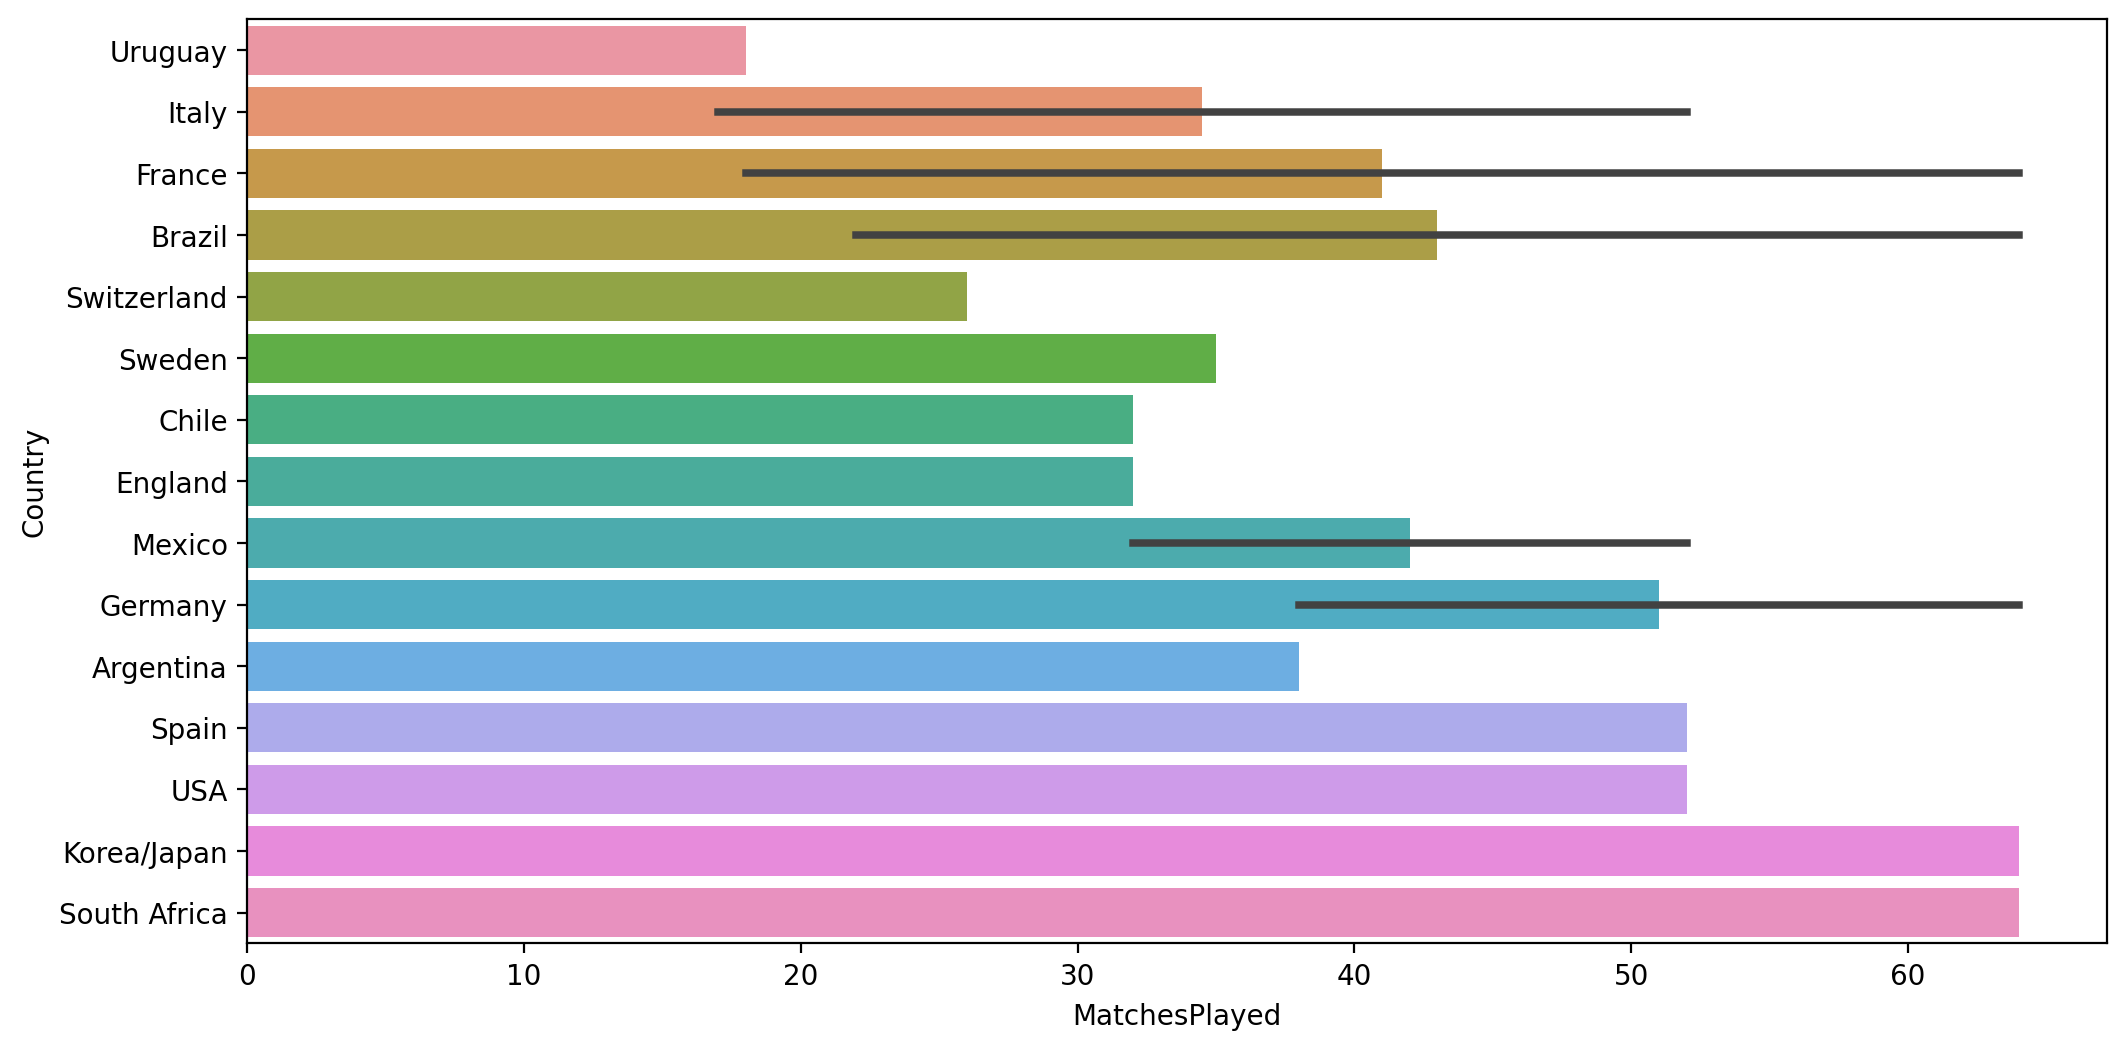

In [12]:
plt.figure(figsize=(12,6),dpi=200)
sns.barplot(y='Country',x='MatchesPlayed',data=df)
plt.show()

In [13]:
df['MatchesPlayed'].value_counts().idxmax()

64

In [14]:
df.loc[df['MatchesPlayed']==64]

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2.785.100
16,2002,Korea/Japan,Brazil,Germany,Turkey,Korea Republic,161,32,64,2.705.197
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3.359.439
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145,32,64,3.178.856
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810


In [15]:
df.loc[(df['MatchesPlayed'] == 64) & (df['GoalsScored'] == df['GoalsScored'].max())]


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2.785.100
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810


In [16]:
df.nlargest(1, 'GoalsScored').loc[:,'Country']
df.loc[15]

Year                     1998
Country                France
Winner                 France
Runners-Up             Brazil
Third                 Croatia
Fourth            Netherlands
GoalsScored               171
QualifiedTeams             32
MatchesPlayed              64
Attendance          2.785.100
Name: 15, dtype: object

##  ANALYSING WINNER COLUMN

In [17]:
df['Winner'].value_counts().sort_values(ascending = False)

Brazil        5
Italy         4
Germany FR    3
Uruguay       2
Argentina     2
England       1
France        1
Spain         1
Germany       1
Name: Winner, dtype: int64

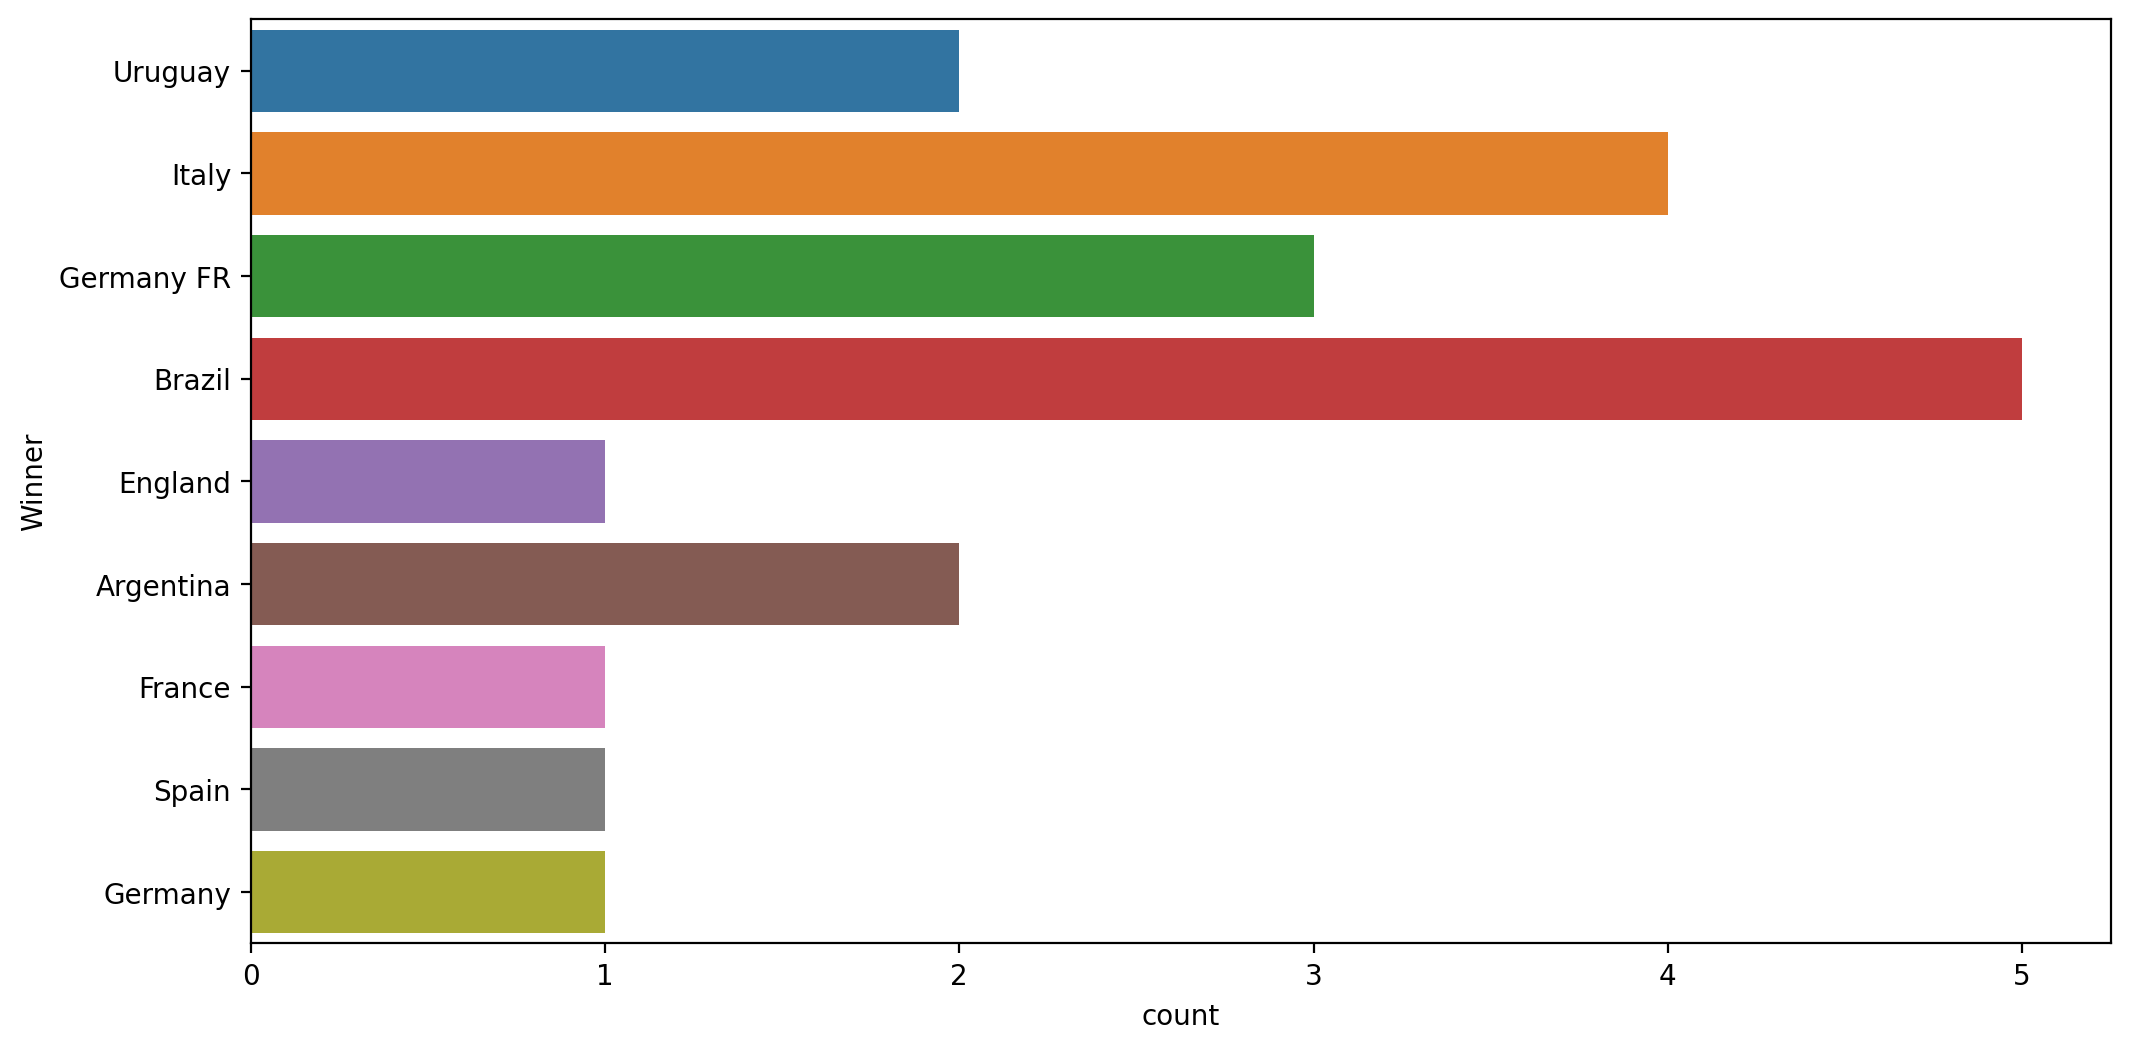

In [18]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(y='Winner',data=df)
plt.show()

### ANALYZING Runners-Up COLUMN

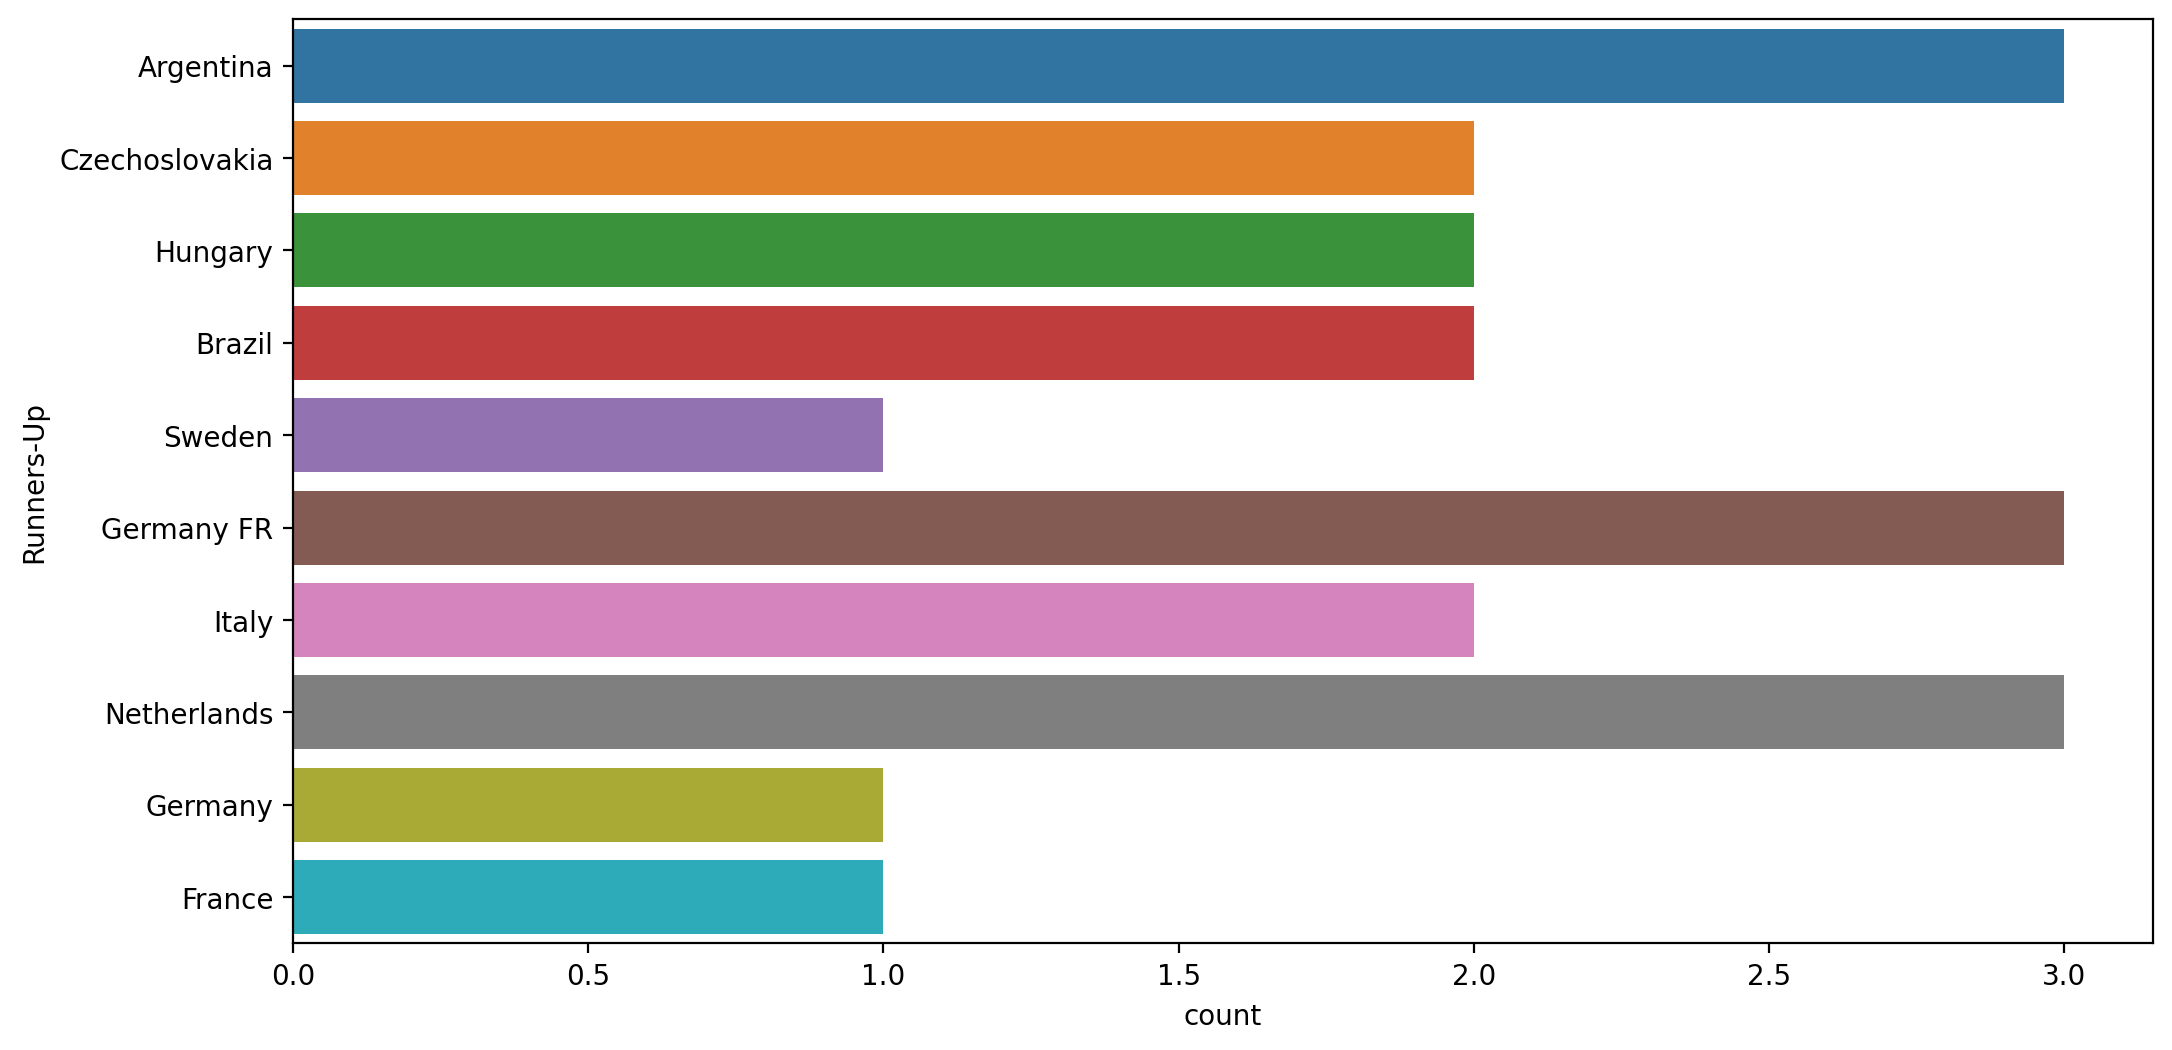

In [19]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(y='Runners-Up',data=df)
plt.show()

In [20]:
df['Runners-Up'].value_counts().sort_values(ascending = False)

Argentina         3
Germany FR        3
Netherlands       3
Czechoslovakia    2
Hungary           2
Brazil            2
Italy             2
Sweden            1
Germany           1
France            1
Name: Runners-Up, dtype: int64

## ANALYZING GoalsScored COLUMN

In [21]:
df['GoalsScored'].mean()

118.95

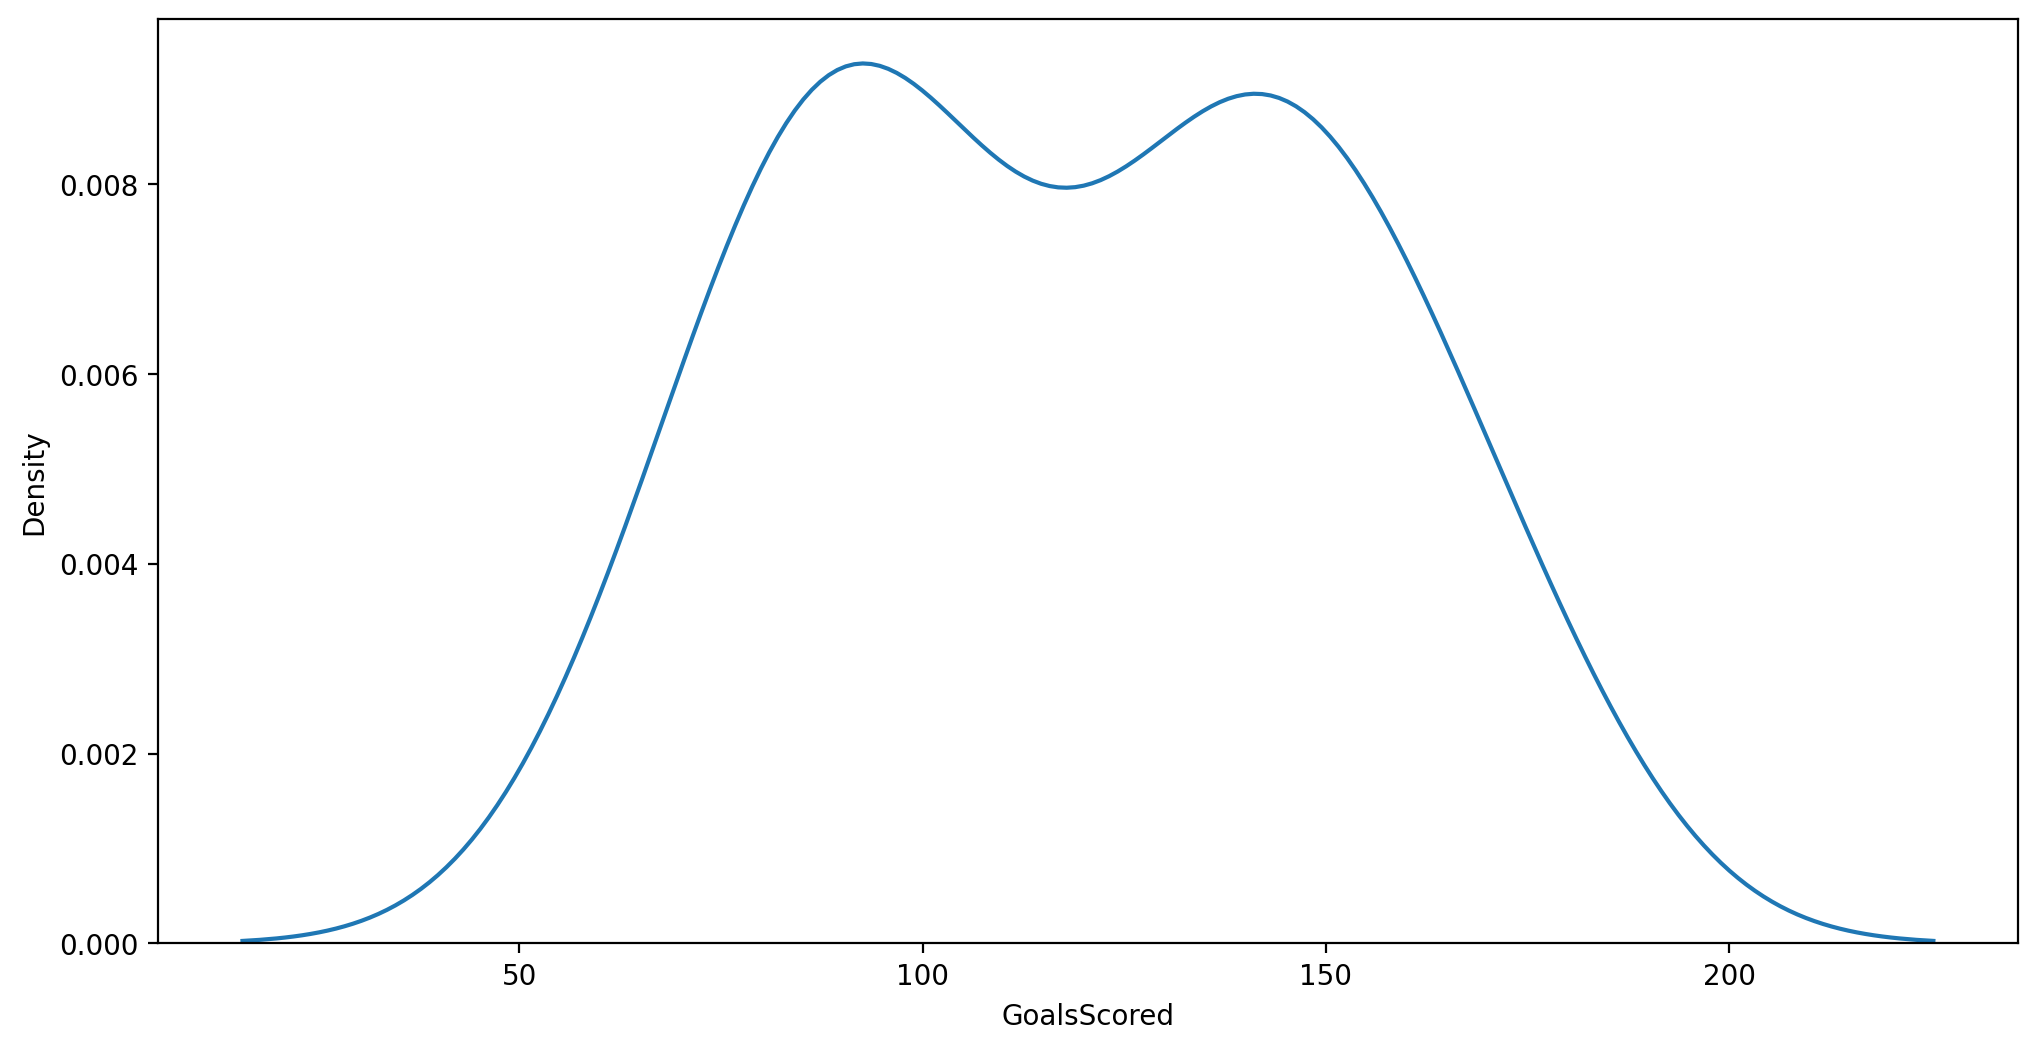

In [22]:
plt.figure(figsize=(12,6),dpi=200)
sns.distplot(df['GoalsScored'],hist=False)
plt.show()

In [23]:
df['GoalsScored'].value_counts().sort_values(ascending = False)

70     2
89     2
171    2
84     1
88     1
140    1
126    1
95     1
97     1
132    1
102    1
115    1
141    1
161    1
147    1
146    1
145    1
Name: GoalsScored, dtype: int64

In [24]:
df.loc[(df['GoalsScored'] == 171)]


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2.785.100
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810


In [25]:
# Remove non-numeric characters (like commas and periods) and convert to integer
df['Attendance'] = df['Attendance'].replace('[^\d]', '', regex=True).astype(int)

print(df.dtypes)


Year               int64
Country           object
Winner            object
Runners-Up        object
Third             object
Fourth            object
GoalsScored        int64
QualifiedTeams     int64
MatchesPlayed      int64
Attendance         int32
dtype: object


In [26]:
df['Attendance'].nlargest(1)

14    3587538
Name: Attendance, dtype: int32

In [27]:
df.loc[(df['Attendance'] == 3587538)]


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
14,1994,USA,Brazil,Italy,Sweden,Bulgaria,141,24,52,3587538


# ----------------------------------------------------------------------------------------------------------------------------------

### ANALYSING ANOTHER DATASET

In [28]:
df2 = pd.read_csv("WorldCupMatches.csv")

In [29]:
df2.head(5)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [30]:
df2.tail(5)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [32]:
print("Columns In the Dataset are :")
for i,m in enumerate (df2.columns):
    print(1+i,m)

Columns In the Dataset are :
1 Year
2 Datetime
3 Stage
4 Stadium
5 City
6 Home Team Name
7 Home Team Goals
8 Away Team Goals
9 Away Team Name
10 Win conditions
11 Attendance
12 Half-time Home Goals
13 Half-time Away Goals
14 Referee
15 Assistant 1
16 Assistant 2
17 RoundID
18 MatchID
19 Home Team Initials
20 Away Team Initials


In [33]:
# Separate categorical and numerical columns
categorical_columns = []
numerical_columns = []

for col in df2.columns:
    if df2[col].dtype == 'object':
        categorical_columns.append(col)
    else:
        numerical_columns.append(col)

print("\033[1mCategorical Columns:\033[0m", categorical_columns,sep="\n")
print()
print()

print("\033[1mNumerical Columns:\033[0m", numerical_columns)

Categorical Columns:
['Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name', 'Away Team Name', 'Win conditions', 'Referee', 'Assistant 1', 'Assistant 2', 'Home Team Initials', 'Away Team Initials']


Numerical Columns: ['Year', 'Home Team Goals', 'Away Team Goals', 'Attendance', 'Half-time Home Goals', 'Half-time Away Goals', 'RoundID', 'MatchID']


## Cheking for Missing values

In [34]:
df2.isnull().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

In [35]:
if df2.isnull().sum().any():
    print("Missing Values Are present in the data set And The Missing Values Are In Column(s):")
    for col in df2.columns[df2.isnull().sum() > 0]:
        print("\033[1m" + col + "\033[0m")
else:
    print('No Missing Values Are In the dataset')


Missing Values Are present in the data set And The Missing Values Are In Column(s):
Year
Datetime
Stage
Stadium
City
Home Team Name
Home Team Goals
Away Team Goals
Away Team Name
Win conditions
Attendance
Half-time Home Goals
Half-time Away Goals
Referee
Assistant 1
Assistant 2
RoundID
MatchID
Home Team Initials
Away Team Initials


In [36]:
df2.duplicated().sum()

3735

In [37]:
df2.drop_duplicates(inplace= True)

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837 entries, 0 to 852
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  836 non-null    float64
 1   Datetime              836 non-null    object 
 2   Stage                 836 non-null    object 
 3   Stadium               836 non-null    object 
 4   City                  836 non-null    object 
 5   Home Team Name        836 non-null    object 
 6   Home Team Goals       836 non-null    float64
 7   Away Team Goals       836 non-null    float64
 8   Away Team Name        836 non-null    object 
 9   Win conditions        836 non-null    object 
 10  Attendance            835 non-null    float64
 11  Half-time Home Goals  836 non-null    float64
 12  Half-time Away Goals  836 non-null    float64
 13  Referee               836 non-null    object 
 14  Assistant 1           836 non-null    object 
 15  Assistant 2           8

In [39]:
df2.isnull().sum()

Year                    1
Datetime                1
Stage                   1
Stadium                 1
City                    1
Home Team Name          1
Home Team Goals         1
Away Team Goals         1
Away Team Name          1
Win conditions          1
Attendance              2
Half-time Home Goals    1
Half-time Away Goals    1
Referee                 1
Assistant 1             1
Assistant 2             1
RoundID                 1
MatchID                 1
Home Team Initials      1
Away Team Initials      1
dtype: int64

In [40]:
df2.Datetime.isnull().any()

True

In [41]:
df2

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,2014.0,29 Jun 2014 - 13:00,Round of 16,Estadio Castelao,Fortaleza,Netherlands,2.0,1.0,Mexico,,58817.0,0.0,0.0,PROENCA Pedro (POR),MIRANDA Bertino (POR),TRIGO Jose (POR),255951.0,300186508.0,NED,MEX
833,2014.0,29 Jun 2014 - 17:00,Round of 16,Arena Pernambuco,Recife,Costa Rica,1.0,1.0,Greece,Costa Rica win on penalties (5 - 3),41242.0,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),255951.0,300186459.0,CRC,GRE
834,2014.0,01 Jul 2014 - 13:00,Round of 16,Arena de Sao Paulo,Sao Paulo,Argentina,1.0,0.0,Switzerland,Argentina win after extra time,63255.0,0.0,0.0,ERIKSSON Jonas (SWE),KLASENIUS Mathias (SWE),WARNMARK Daniel (SWE),255951.0,300186503.0,ARG,SUI
835,2014.0,01 Jul 2014 - 17:00,Round of 16,Arena Fonte Nova,Salvador,Belgium,2.0,1.0,USA,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255951.0,300186497.0,BEL,USA


## FILLING NULL VALUES WITH MODE


In [42]:
df2.mode().iloc[0]

Year                                      1998.0
Datetime                    27 May 1934 - 16:30 
Stage                                Round of 16
Stadium                           Estadio Azteca
City                                Mexico City 
Home Team Name                            Brazil
Home Team Goals                              1.0
Away Team Goals                              1.0
Away Team Name                            Mexico
Win conditions                                  
Attendance                               43000.0
Half-time Home Goals                         0.0
Half-time Away Goals                         0.0
Referee                    Ravshan IRMATOV (UZB)
Assistant 1                  BERANEK Alois (AUT)
Assistant 2             KOCHKAROV Bakhadyr (KGZ)
RoundID                                   1014.0
MatchID                                     25.0
Home Team Initials                           BRA
Away Team Initials                           MEX
Name: 0, dtype: obje

In [43]:
df2.fillna(df2.mode().iloc[0], inplace=True)


In [44]:
df2.isnull().sum()

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              0
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

In [45]:
df2.drop('Datetime', axis=1, inplace=True)



In [46]:
df2.head(5)

,Year,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


### ANALYSING COLUMN YEAR

In [47]:
df2.Year.nunique()

20

In [48]:
df2.Year.value_counts()

1998.0    65
2014.0    64
2010.0    64
2006.0    64
2002.0    64
1982.0    52
1994.0    52
1990.0    52
1986.0    52
1978.0    38
1974.0    38
1958.0    35
1970.0    32
1966.0    32
1962.0    32
1954.0    26
1950.0    22
1938.0    18
1930.0    18
1934.0    17
Name: Year, dtype: int64

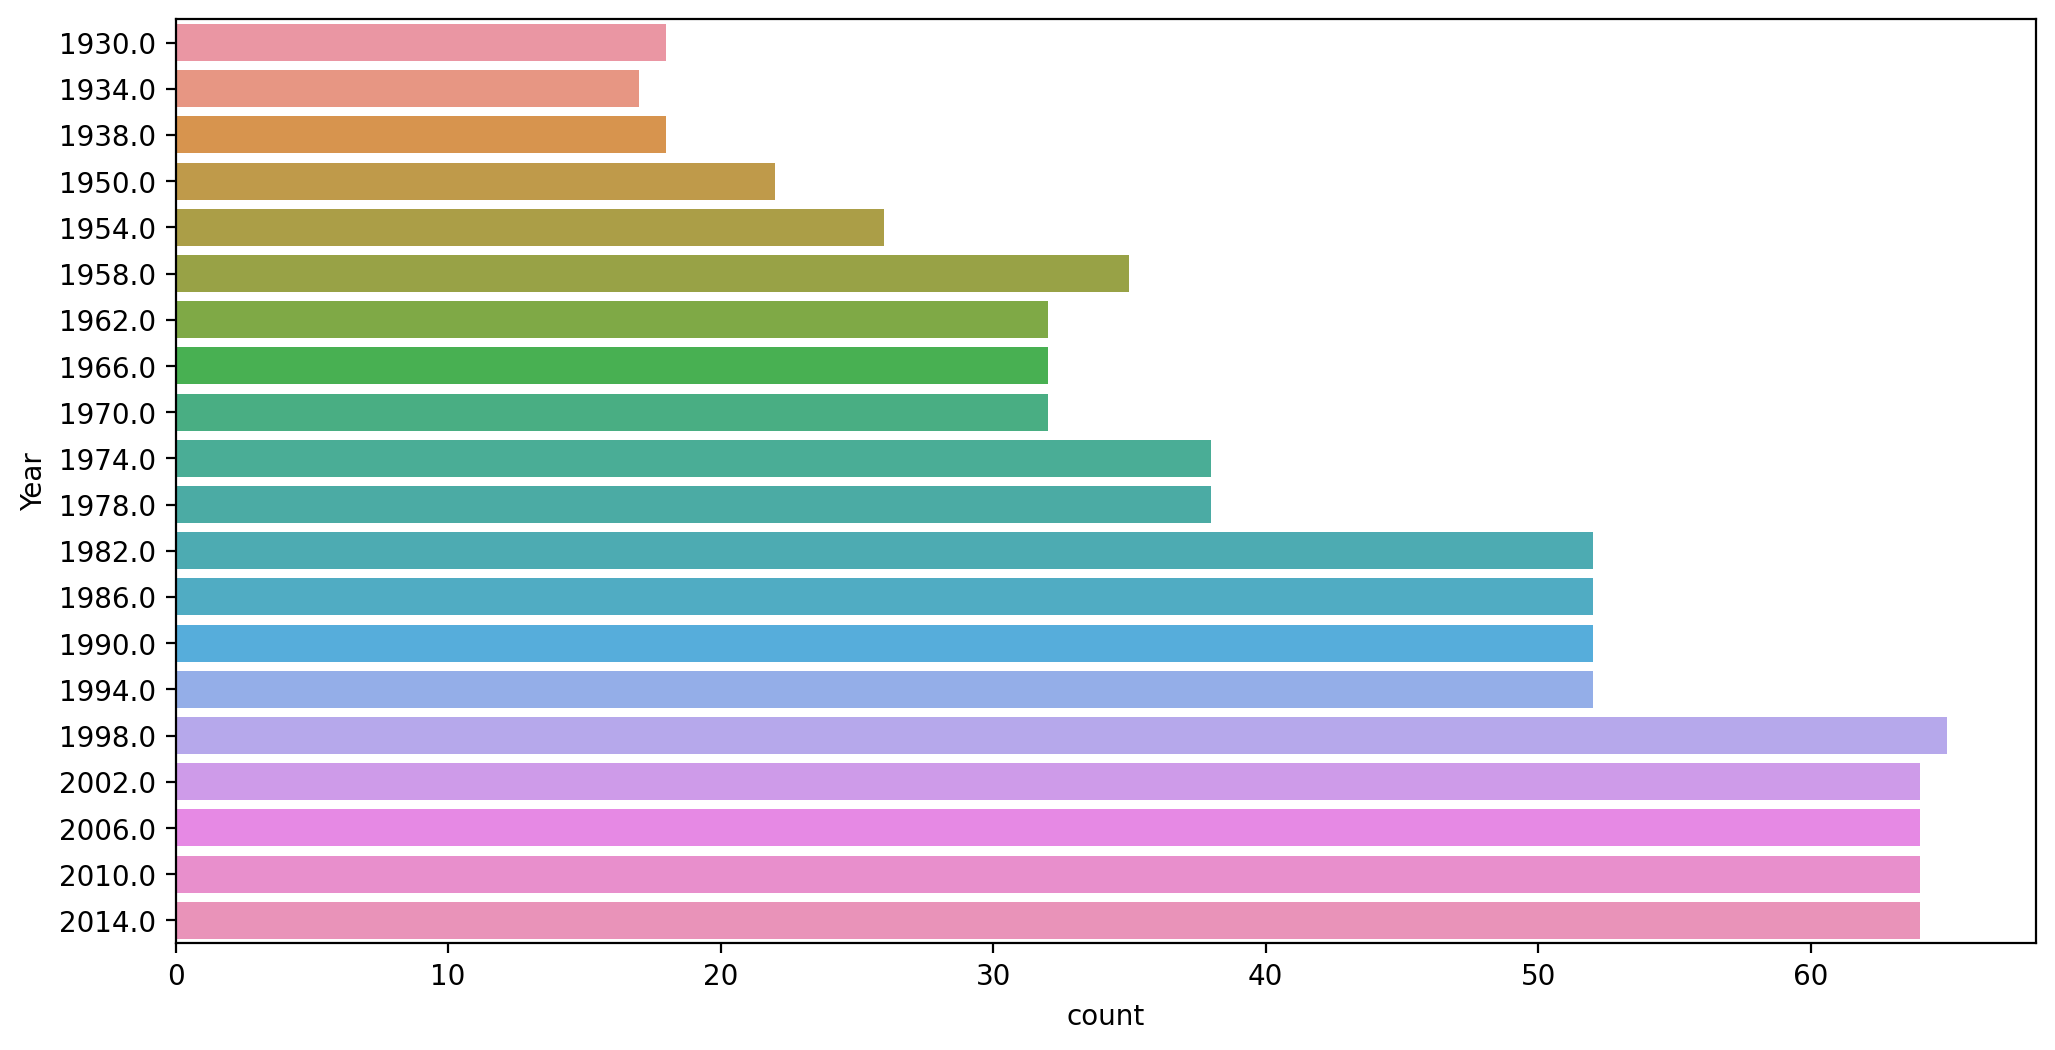

In [49]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(y=df2['Year'])
plt.show()

### ANALYSING COLUMN STAGE

In [50]:
uni =df2['Stage'].unique()
no = df2['Stage'].nunique()
print(no)
print(uni)

23
['Group 1' 'Group 4' 'Group 2' 'Group 3' 'Semi-finals' 'Final'
 'Preliminary round' 'Quarter-finals' 'Match for third place'
 'First round' 'Group 6' 'Group B' 'Group A' 'Group 5' 'Group C' 'Group D'
 'Group F' 'Group E' 'Round of 16' 'Group H' 'Group G' 'Third place'
 'Play-off for third place']


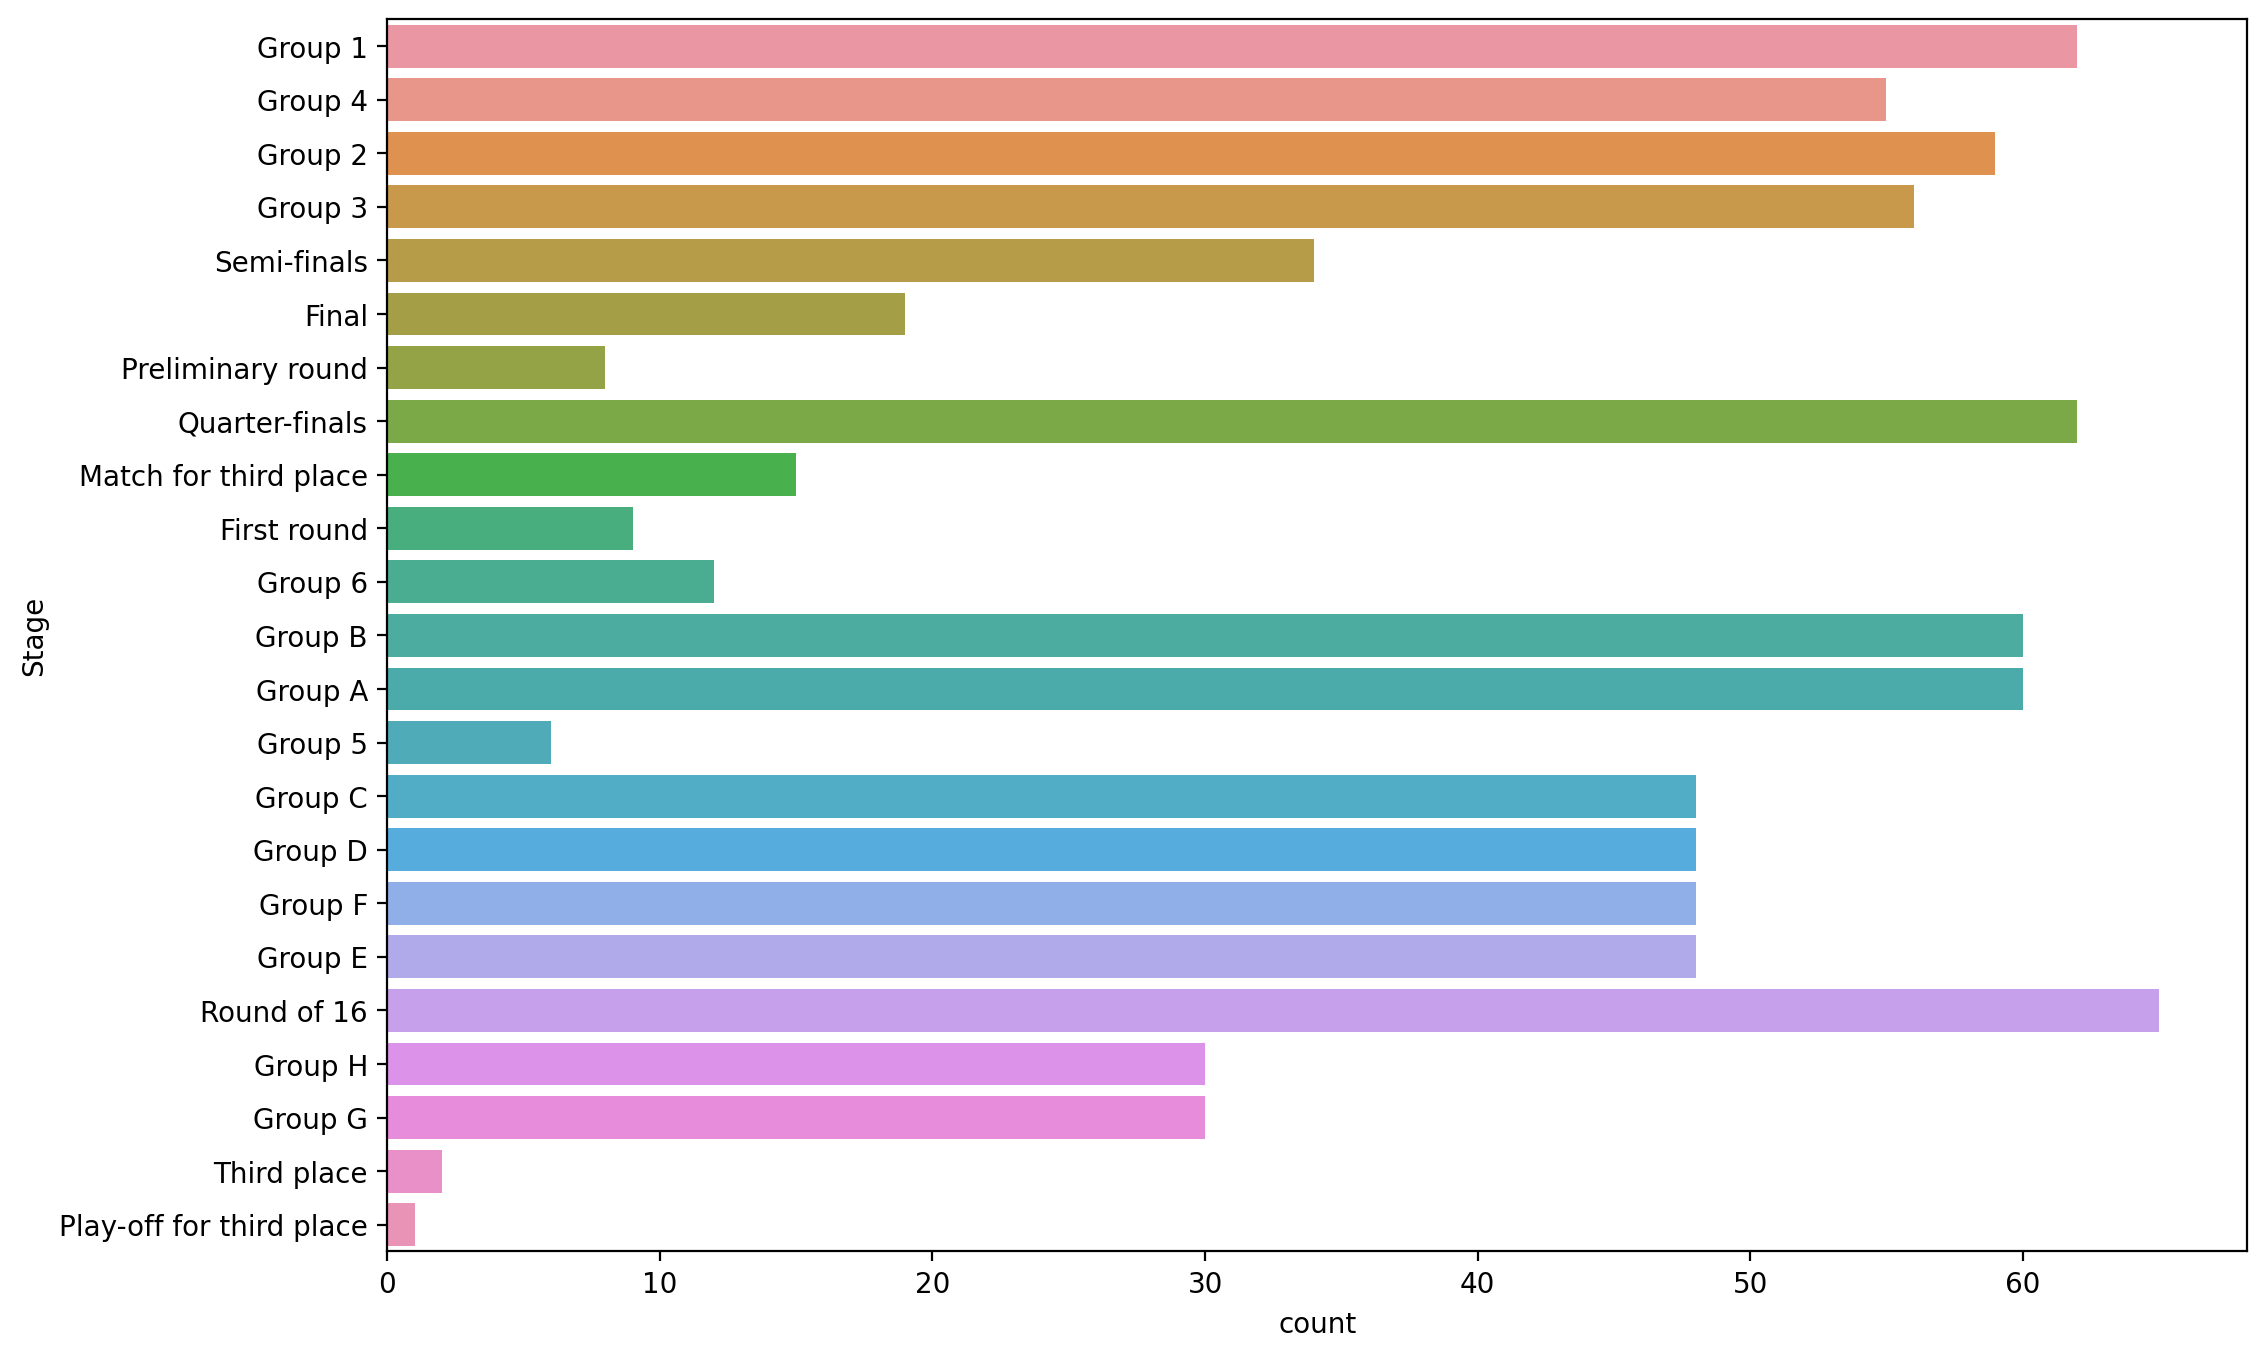

In [51]:
plt.figure(figsize=(12,8),dpi=200)
sns.countplot(y=df2['Stage'])
plt.show()

In [52]:
df2['Stage'].value_counts()


Round of 16                 65
Group 1                     62
Quarter-finals              62
Group A                     60
Group B                     60
Group 2                     59
Group 3                     56
Group 4                     55
Group C                     48
Group D                     48
Group E                     48
Group F                     48
Semi-finals                 34
Group G                     30
Group H                     30
Final                       19
Match for third place       15
Group 6                     12
First round                  9
Preliminary round            8
Group 5                      6
Third place                  2
Play-off for third place     1
Name: Stage, dtype: int64

### ANALYSING COLUMN STADIUM

In [53]:
df2['Stadium'].mode()[0]

'Estadio Azteca'

In [54]:
df2.loc[df2['Stadium'] == 'Estadio Azteca'].nlargest(1, 'Attendance')


,Year,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
379,1986.0,Group B,Estadio Azteca,Mexico City,Mexico,1.0,1.0,Paraguay,,114600.0,1.0,0.0,COURTNEY George (ENG),FREDRIKSSON Erik (SWE),IGNA Ioan (ROU),308.0,680.0,MEX,PAR


## ANALYSING CITY COLUMN

In [55]:
df2.City.nunique()

151

In [56]:
df2.City.unique()

array(['Montevideo ', 'Turin ', 'Naples ', 'Milan ', 'Bologna ',
       'Florence ', 'Genoa ', 'Rome ', 'Trieste ', 'Paris ', 'Reims ',
       'Colombes ', 'Toulouse ', 'Marseilles ', 'Strasbourg ',
       'Le Havre ', 'Bordeaux ', 'Lille ', 'Antibes ', 'Rio De Janeiro ',
       'Curitiba ', 'Sao Paulo ', 'Belo Horizonte ', 'Porto Alegre ',
       'Recife ', 'Berne ', 'Zurich ', 'Geneva ', 'Lausanne ', 'Basel ',
       'Lugano ', 'Solna ', 'Gothenburg ', 'Malm� ', 'Sandviken ',
       'Norrk�Ping ', 'Vasteras ', 'Udevalla ', 'Halmstad ', 'Boras ',
       'Helsingborg ', 'Eskilstuna ', 'Orebro ', 'Arica ',
       'Vina Del Mar ', 'Rancagua ', 'Santiago De Chile ', 'London ',
       'Sheffield ', 'Liverpool ', 'Middlesbrough ', 'Manchester ',
       'Birmingham ', 'Sunderland ', 'Mexico City ', 'Puebla ', 'Leon ',
       'Guadalajara ', 'Toluca ', 'Frankfurt/Main ', 'Berlin West ',
       'Hamburg ', 'Dortmund ', 'Hanover ', 'D�Sseldorf ', 'Munich ',
       'Stuttgart ', 'Gelsenkirchen '

In [57]:
df2.City.mode()

0    Mexico City 
Name: City, dtype: object

In [58]:
c = df2.City.mode()[0]
df2.loc[df2['City'] == c].nlargest(1, 'Attendance')


,Year,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
379,1986.0,Group B,Estadio Azteca,Mexico City,Mexico,1.0,1.0,Paraguay,,114600.0,1.0,0.0,COURTNEY George (ENG),FREDRIKSSON Erik (SWE),IGNA Ioan (ROU),308.0,680.0,MEX,PAR


## ANALYSING Home Team Name  COLUMN

In [59]:
df2['Home Team Name'].unique()

array(['France', 'USA', 'Yugoslavia', 'Romania', 'Argentina', 'Chile',
       'Uruguay', 'Brazil', 'Paraguay', 'Austria', 'Hungary',
       'Switzerland', 'Sweden', 'Germany', 'Spain', 'Italy',
       'Czechoslovakia', 'Cuba', 'England', 'Germany FR', 'Turkey',
       'Soviet Union', 'Northern Ireland', 'Mexico', 'Wales', 'Portugal',
       'Korea DPR', 'Peru', 'Belgium', 'Bulgaria', 'German DR', 'Zaire',
       'Poland', 'Australia', 'Scotland', 'Netherlands', 'Haiti',
       'Tunisia', 'Algeria', 'Honduras', 'Canada', 'Morocco',
       'Korea Republic', 'Iraq', 'Denmark', 'rn">United Arab Emirates',
       'Costa Rica', 'Cameroon', 'rn">Republic of Ireland', 'Colombia',
       'Norway', 'Nigeria', 'Saudi Arabia', 'Bolivia', 'Russia', 'Greece',
       'Jamaica', 'South Africa', 'Japan', 'Croatia', 'China PR',
       'Senegal', 'Slovenia', 'Ecuador', 'rn">Trinidad and Tobago',
       'rn">Serbia and Montenegro', 'Angola', 'Czech Republic', 'Togo',
       'Iran', "C�te d'Ivoire", 'Ghana

In [60]:
df2['Home Team Name'].value_counts()

Brazil                        79
Italy                         57
Argentina                     52
Germany FR                    43
England                       35
                              ..
Wales                          1
Norway                         1
rn">United Arab Emirates       1
Haiti                          1
rn">Bosnia and Herzegovina     1
Name: Home Team Name, Length: 78, dtype: int64

In [61]:
df2['Home Team Name'].mode()

0    Brazil
Name: Home Team Name, dtype: object

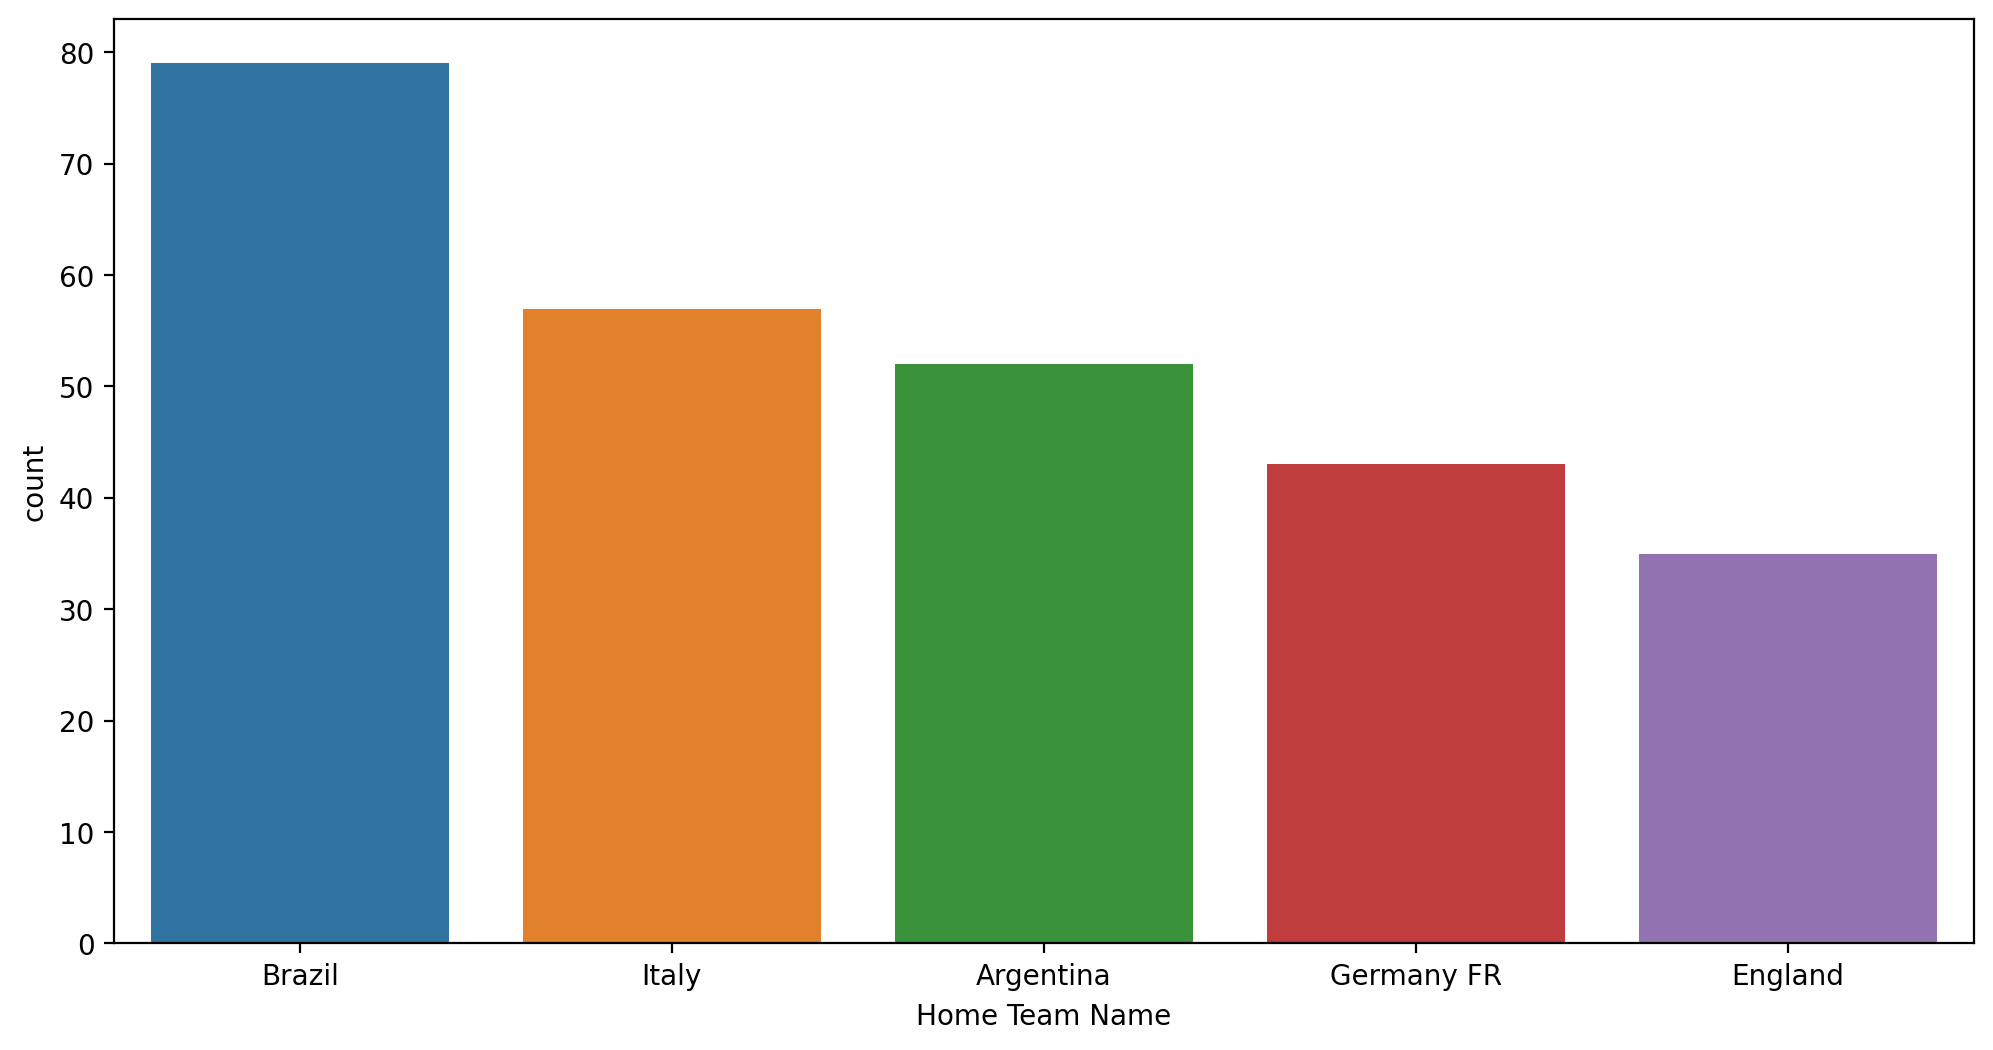

In [62]:

c = df2['Home Team Name'].value_counts().nlargest(5)
plt.figure(figsize=(12, 6), dpi=200)
sns.countplot(data=df2, x='Home Team Name', order=c.index)
plt.show()


## ANALYSING Away Team Goals COLUMN

In [63]:
df2['Home Team Goals'].unique()

array([ 4.,  3.,  2.,  1.,  6.,  5.,  7.,  8.,  9.,  0., 10.])

In [64]:
df2['Home Team Goals'].mean()

1.8231780167264038

In [65]:
df2['Home Team Goals'].value_counts()

1.0     241
2.0     199
0.0     173
3.0     116
4.0      59
6.0      17
5.0      17
7.0       8
8.0       4
9.0       2
10.0      1
Name: Home Team Goals, dtype: int64

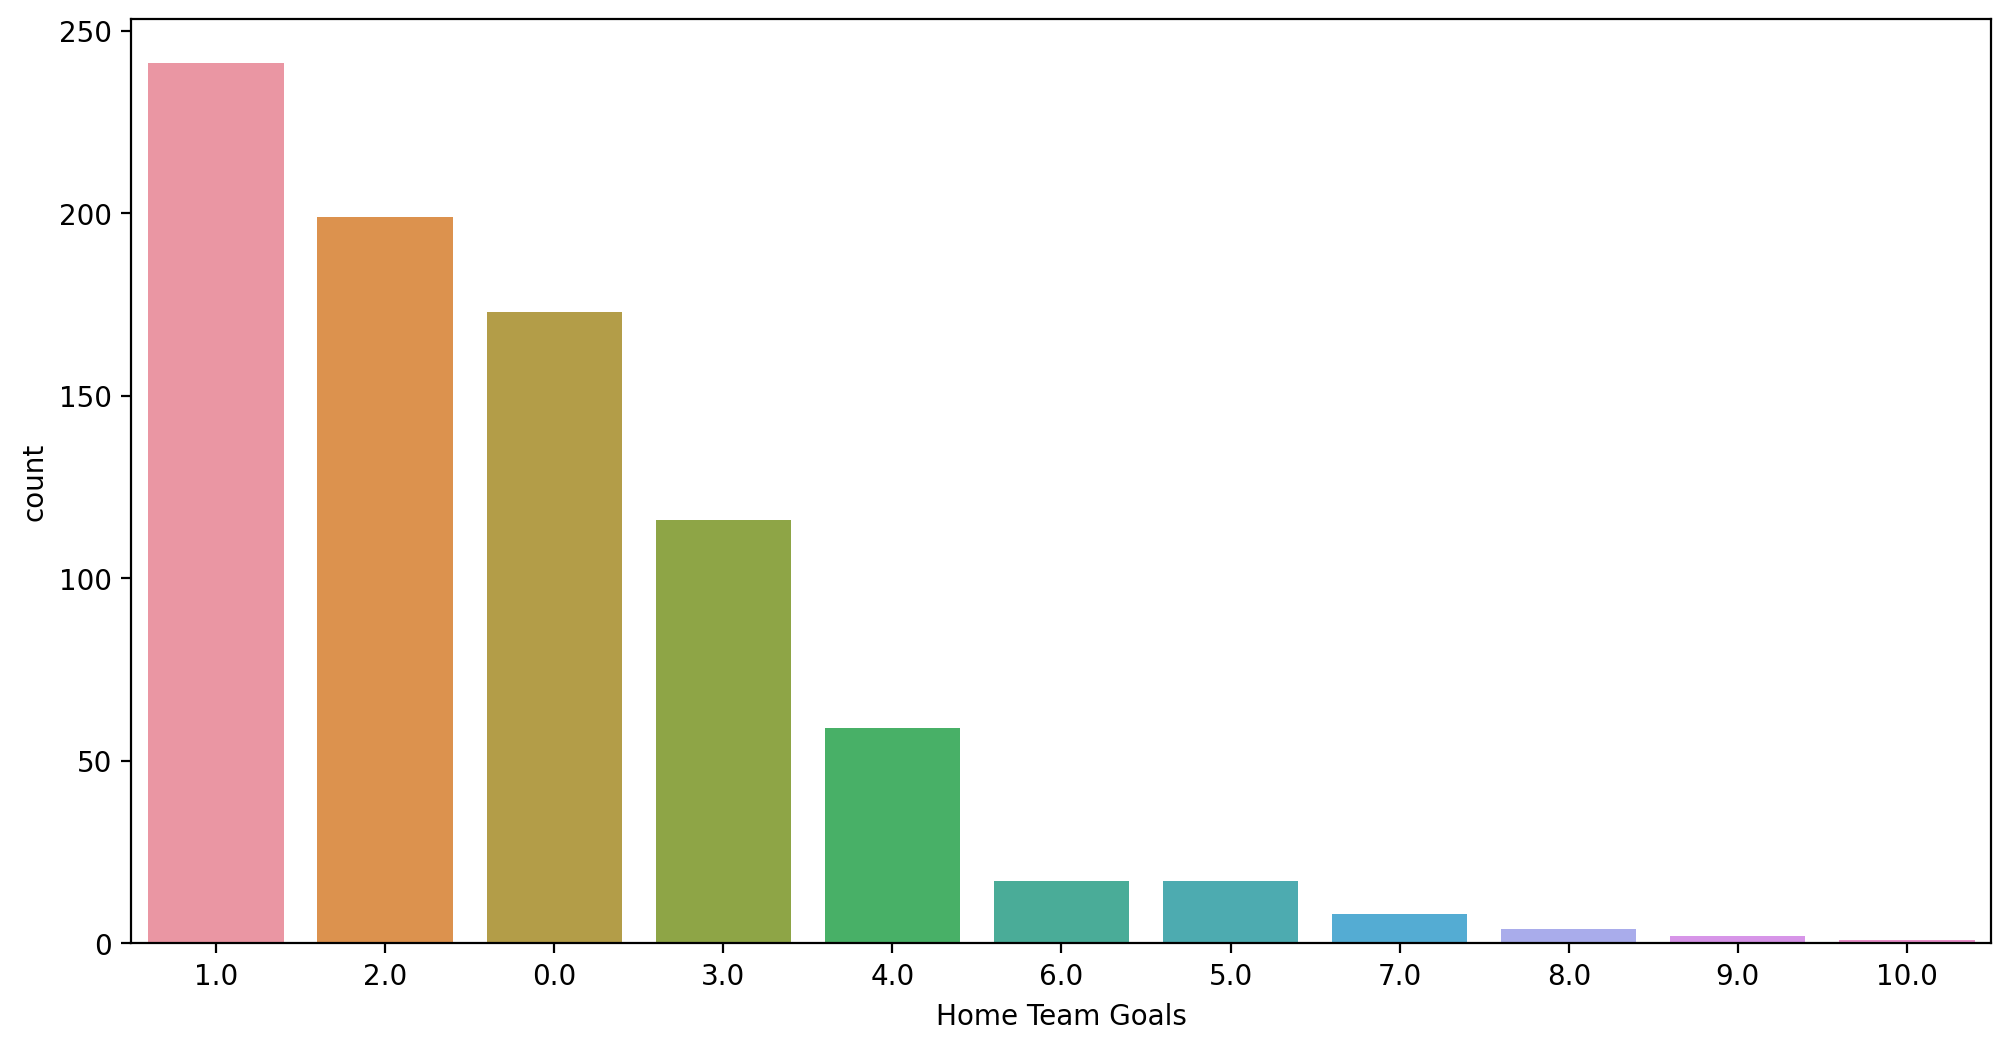

In [66]:
g = df2['Home Team Goals'].value_counts()
plt.figure(figsize=(12, 6), dpi=200)
sns.countplot(data=df2, x='Home Team Goals', order=g.index)
plt.show()


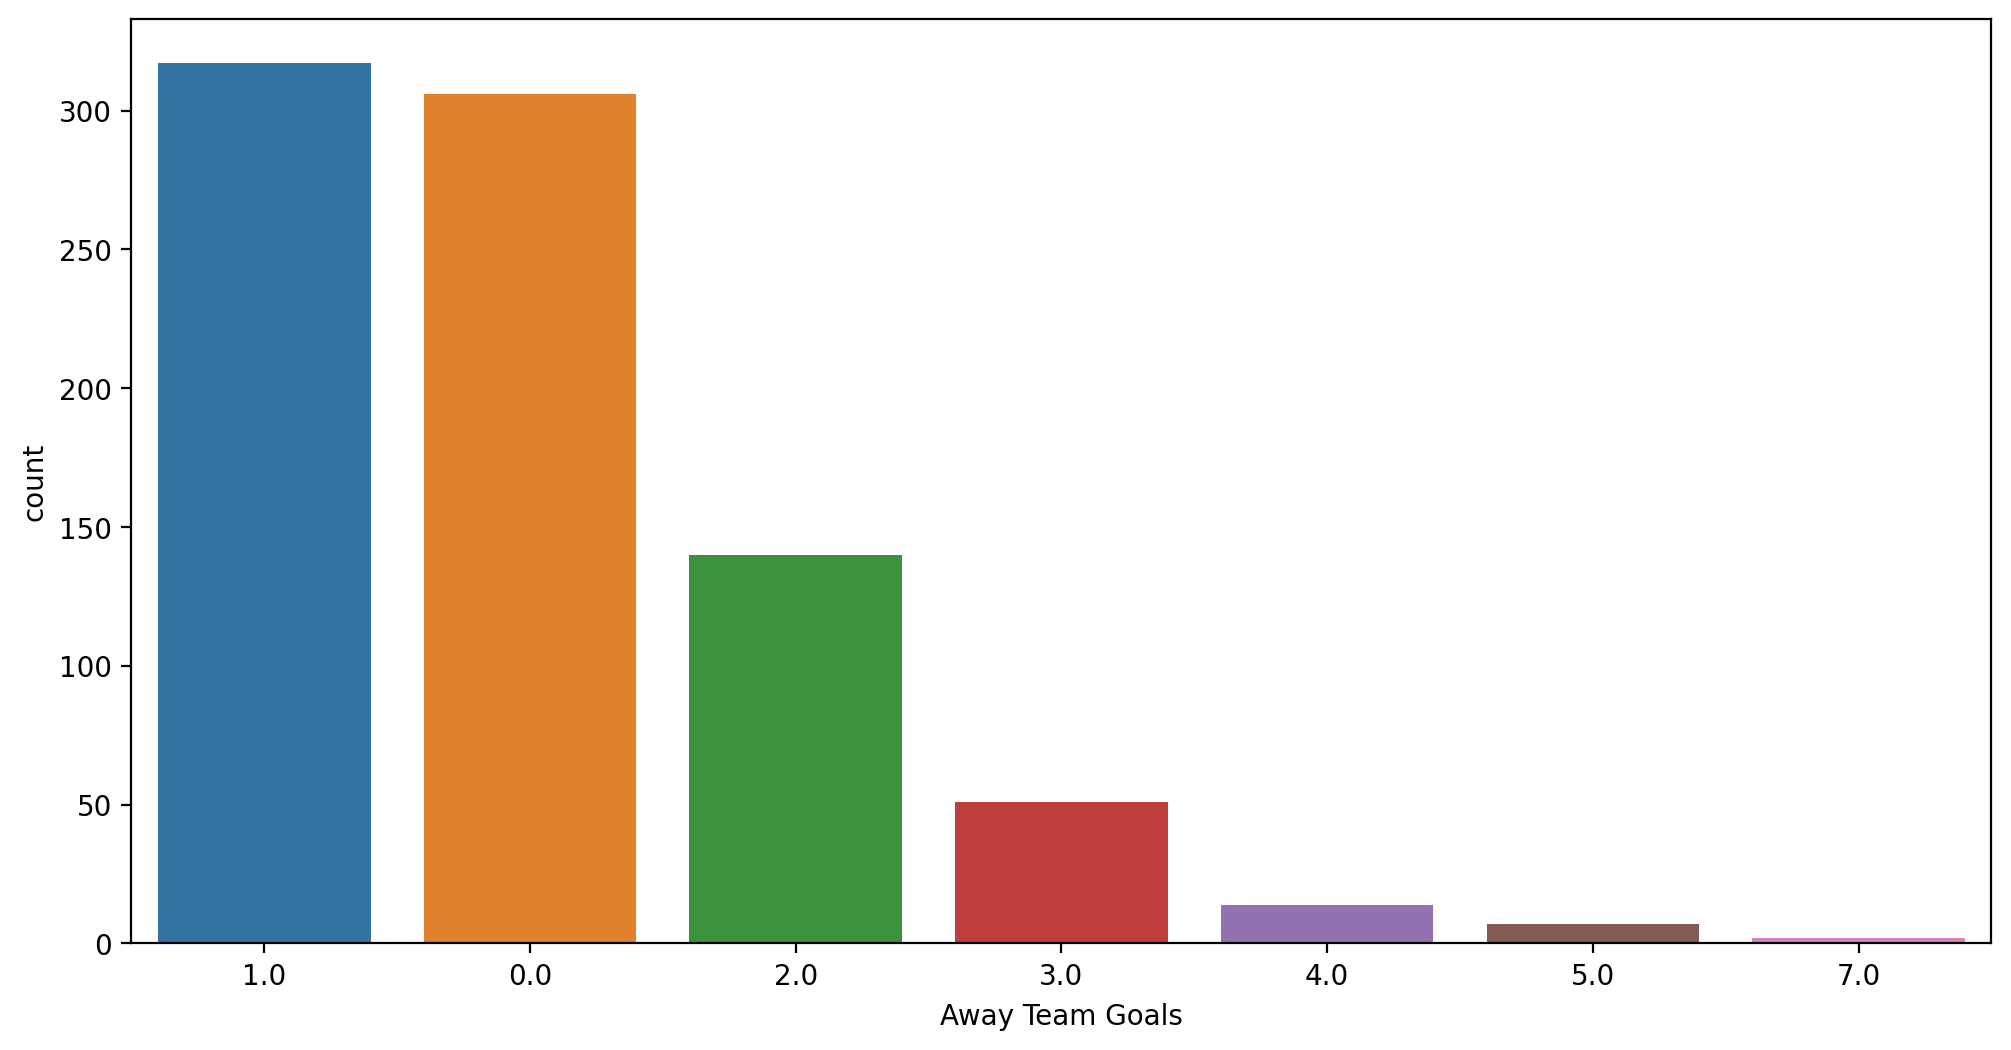

In [67]:
h = df2['Away Team Goals'].value_counts()
plt.figure(figsize=(12, 6), dpi=200)
sns.countplot(data=df2, x='Away Team Goals', order=h.index)
plt.show()


In [68]:
df2['Away Team Goals'].value_counts()

1.0    317
0.0    306
2.0    140
3.0     51
4.0     14
5.0      7
7.0      2
Name: Away Team Goals, dtype: int64

## ANALYSING Away Team Goals COLUMN

In [69]:
df2.head(1)

,Year,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX


In [70]:
df2['Away Team Name'].value_counts()

Mexico               38
France               30
Spain                29
England              27
Italy                26
                     ..
Dutch East Indies     1
Togo                  1
Cuba                  1
Zaire                 1
Iraq                  1
Name: Away Team Name, Length: 83, dtype: int64

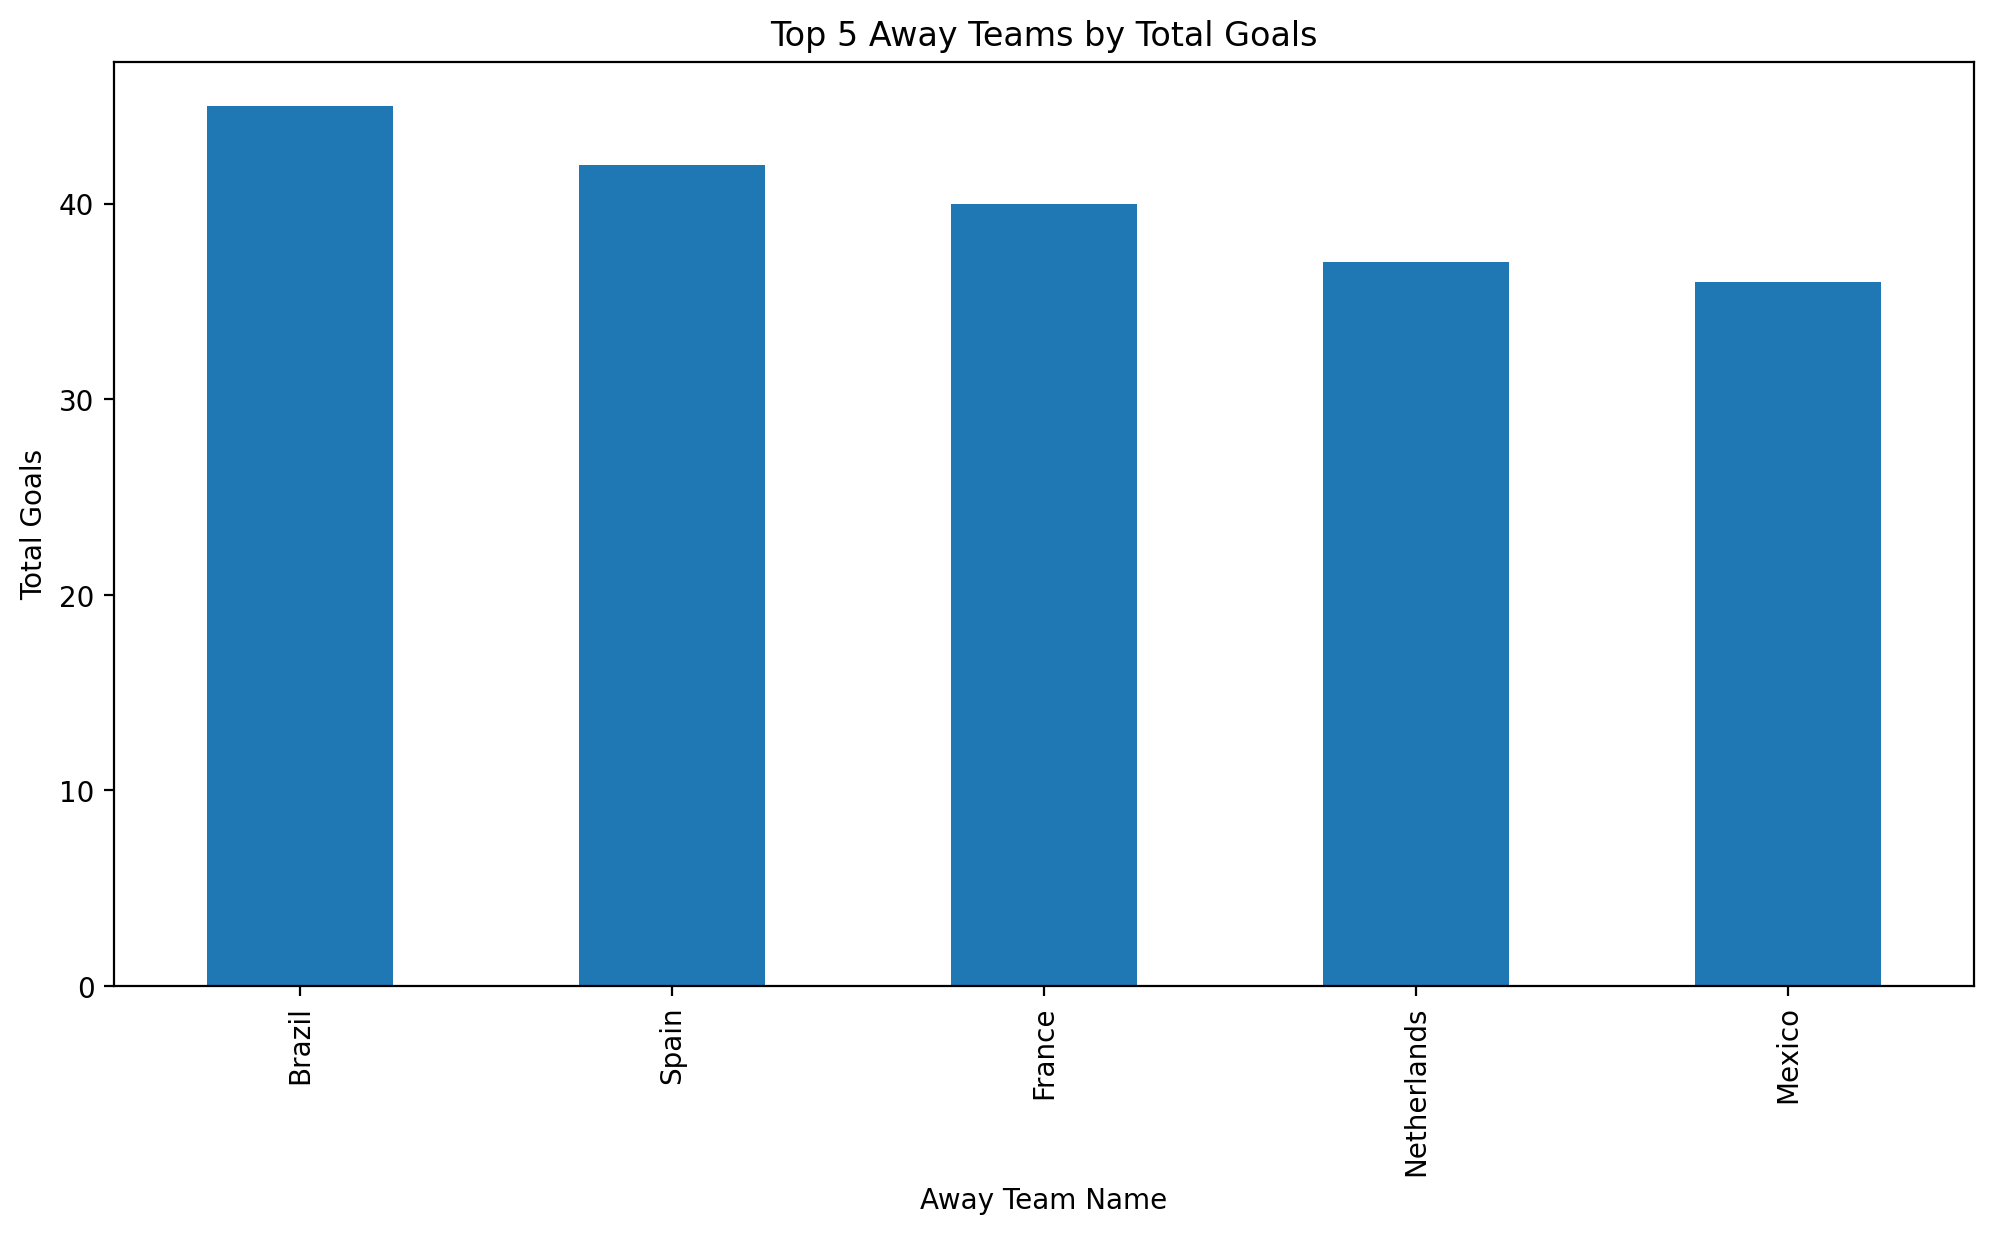

In [71]:
top_5_away_teams = df2.groupby('Away Team Name')['Away Team Goals'].sum().nlargest(5)
top_5_away_teams
plt.figure(figsize=(12, 6), dpi=200)
top_5_away_teams.plot(kind='bar')
plt.xlabel('Away Team Name')
plt.ylabel('Total Goals')
plt.title('Top 5 Away Teams by Total Goals')
plt.show()

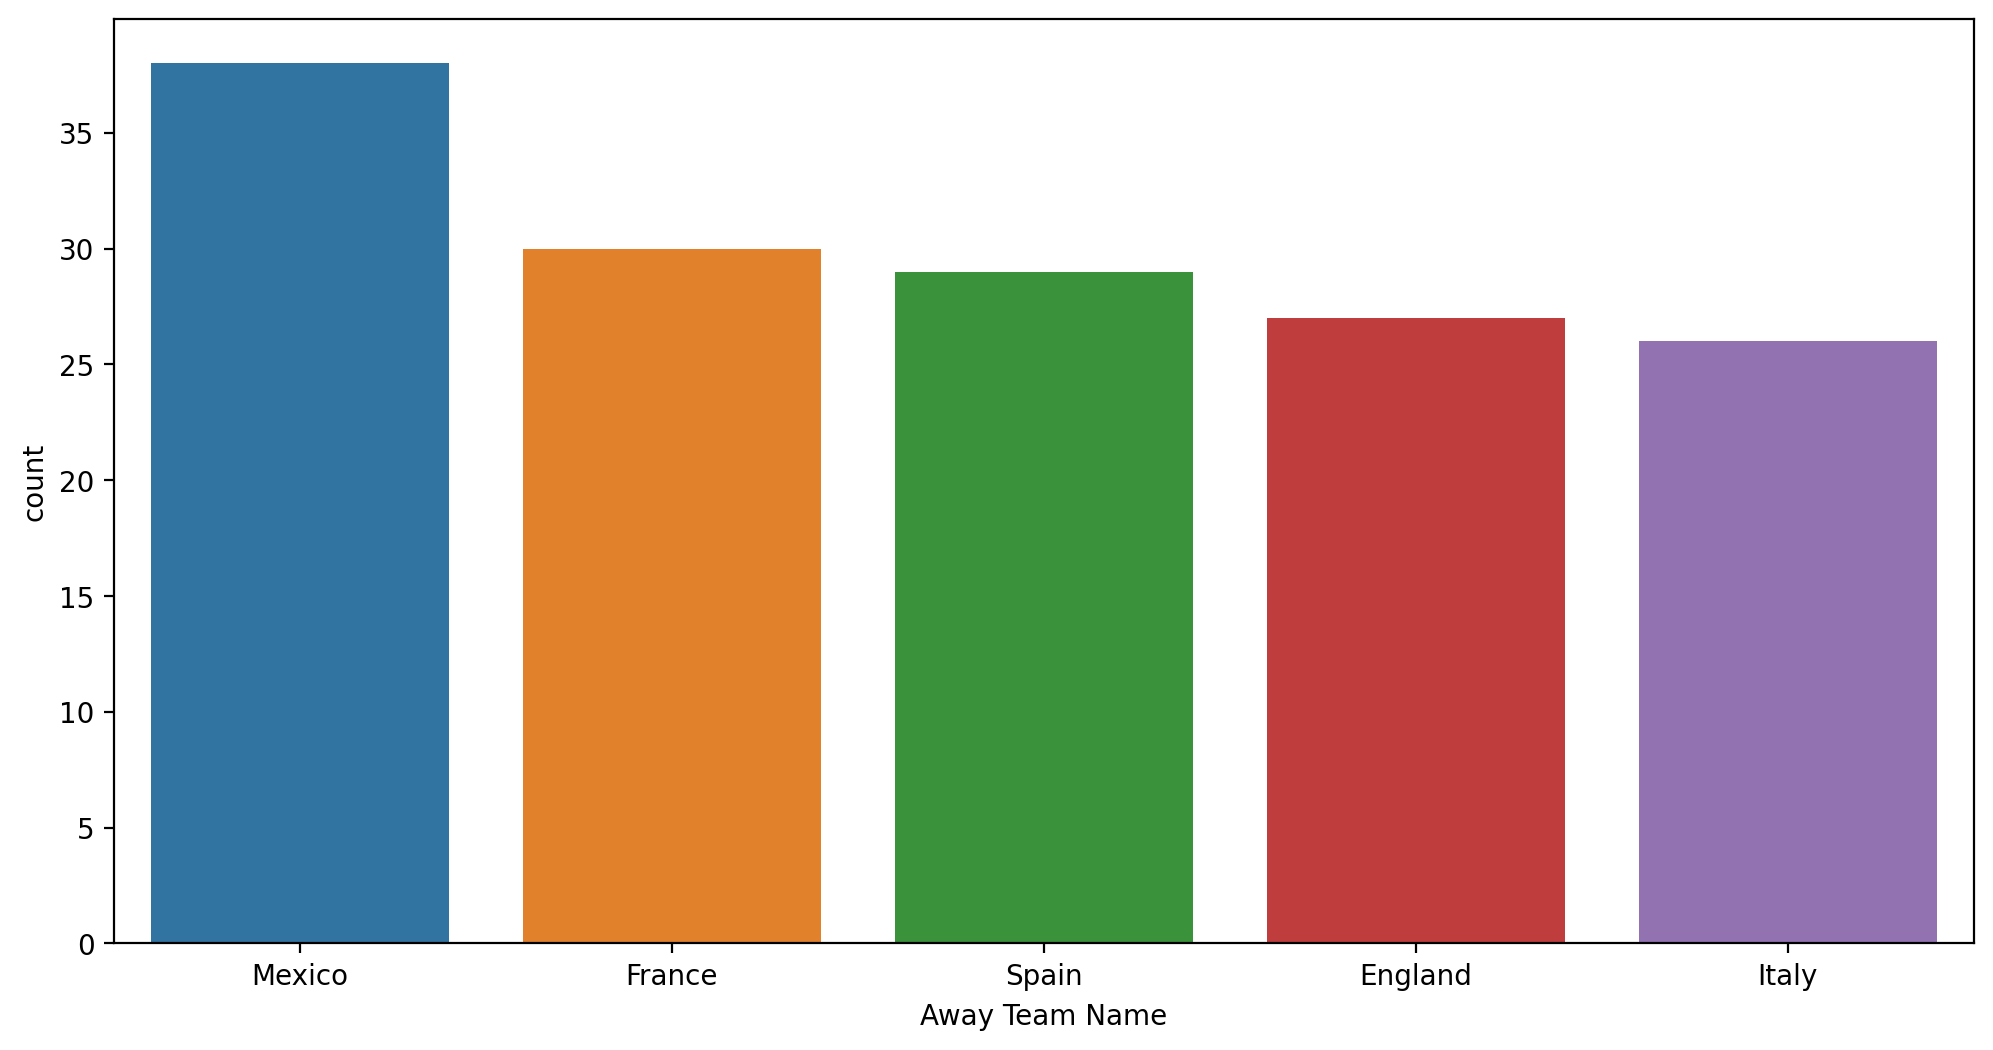

In [72]:
n = df2['Away Team Name'].value_counts().nlargest(5)
plt.figure(figsize=(12, 6), dpi=200)
sns.countplot(data=df2, x='Away Team Name', order=n.index)
plt.show()


## ANALYSING COLUMN WIN CONDITIONS

In [73]:
df2['Win conditions'].unique()

array([' ', 'Austria win after extra time ',
       'Italy win after extra time ', 'Brazil win after extra time ',
       'Czechoslovakia win after extra time ',
       'Hungary win after extra time ',
       'Northern Ireland win after extra time ',
       'England win after extra time ',
       'Germany FR win after extra time ',
       'Uruguay win after extra time ', 'Argentina win after extra time ',
       ' win on penalties (5 - 4) ', 'Belgium win after extra time ',
       'France win on penalties (3 - 4) ',
       'Germany FR win on penalties (4 - 1) ',
       'Belgium win on penalties (4 - 5) ',
       'France win after extra time ', 'Cameroon win after extra time ',
       'Republic of Ireland win on penalties (5 - 4) ',
       'Yugoslavia win after extra time ', ' win on penalties (2 - 3) ',
       ' win on penalties (3 - 4) ', ' win on penalties (4 - 3) ',
       'Bulgaria win on penalties (1 - 3) ',
       'Sweden win on penalties (4 - 5) ',
       'Brazil win on penaltie

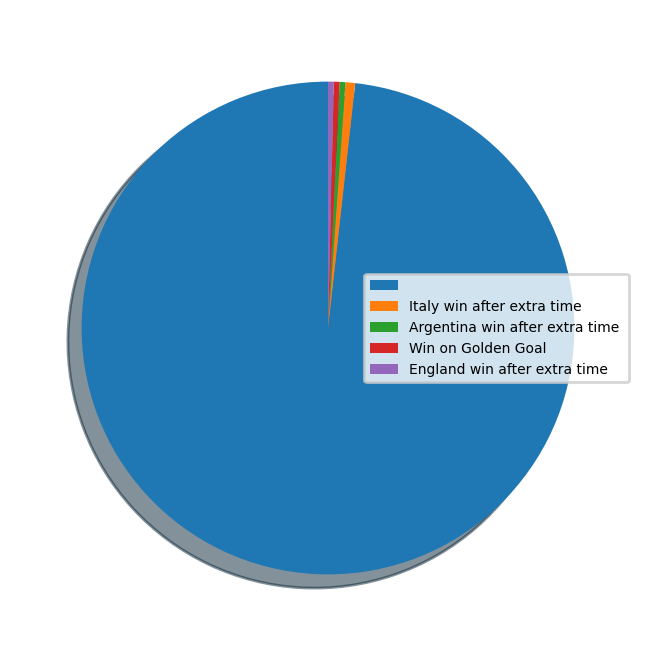

In [74]:
y = df2['Win conditions'].value_counts().nlargest(5)
labels = df2['Win conditions'].value_counts().nlargest(5).index
plt.figure(figsize=(4,4),dpi=200)
plt.pie(y,startangle = 90,shadow = True)
plt.legend(labels=labels,loc='right',fontsize=5)
plt.show()

In [75]:
df2

,Year,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,2014.0,Round of 16,Estadio Castelao,Fortaleza,Netherlands,2.0,1.0,Mexico,,58817.0,0.0,0.0,PROENCA Pedro (POR),MIRANDA Bertino (POR),TRIGO Jose (POR),255951.0,300186508.0,NED,MEX
833,2014.0,Round of 16,Arena Pernambuco,Recife,Costa Rica,1.0,1.0,Greece,Costa Rica win on penalties (5 - 3),41242.0,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),255951.0,300186459.0,CRC,GRE
834,2014.0,Round of 16,Arena de Sao Paulo,Sao Paulo,Argentina,1.0,0.0,Switzerland,Argentina win after extra time,63255.0,0.0,0.0,ERIKSSON Jonas (SWE),KLASENIUS Mathias (SWE),WARNMARK Daniel (SWE),255951.0,300186503.0,ARG,SUI
835,2014.0,Round of 16,Arena Fonte Nova,Salvador,Belgium,2.0,1.0,USA,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255951.0,300186497.0,BEL,USA


## ANALYSING COLUMN REFEREE

In [76]:
df2['Referee'].unique()

array(['LOMBARDI Domingo (URU)', 'MACIAS Jose (ARG)',
       'TEJADA Anibal (URU)', 'WARNKEN Alberto (CHI)',
       'REGO Gilberto (BRA)', 'CRISTOPHE Henry (BEL)',
       'MATEUCCI Francisco (URU)', 'LANGENUS Jean (BEL)',
       'SAUCEDO Ulises (BOL)', 'BALWAY Thomas (FRA)',
       'VALLARINO Ricardo (URU)', 'VAN MOORSEL Johannes (NED)',
       'BARLASSINA Rinaldo (ITA)', 'EKLIND Ivan (SWE)',
       'BRAUN Eugen (AUT)', 'MATTEA Francesco (ITA)',
       'BIRLEM Alfred (GER)', 'MERCET Rene (SUI)', 'BERANEK Alois (AUT)',
       'BAERT Louis (BEL)', 'CARRARO Albino (ITA)', 'CONRIE Roger (FRA)',
       'WUETHRICH Hans (SUI)', 'SCARPI Giuseppe (ITA)',
       'LECLERCQ Lucien (FRA)', 'VON HERTZKA Pal (HUN)',
       'KRIST Gustav (TCH)', 'CAPDEVILLE Georges (FRA)',
       'READER George (ENG)', 'VAN DER MEER Karel (NED)',
       'VIANA Mario (BRA)', 'LUTZ Jean (SUI)', 'GALEATI Giovanni (ITA)',
       'AZON ROMA Ramon (ESP)', 'LEAFE Reginald (ENG)',
       'MALCHER Alberto (BRA)', 'MITCHELL Rob

In [77]:
#Most used Referee
df2['Referee'].mode()

0    Ravshan IRMATOV (UZB)
Name: Referee, dtype: object

In [78]:
count = df2['Referee'].value_counts().get('Ravshan IRMATOV (UZB)', 0)
print("Most Used Referee In the dataset  : ",count)

Most Used Referee In the dataset  :  10


In [79]:
df2['Referee'].value_counts().nlargest(5)

Ravshan IRMATOV (UZB)       10
LARRIONDA Jorge (URU)        8
QUINIOU Joel (FRA)           8
ARCHUNDIA Benito (MEX)       8
DE BLEECKERE Frank (BEL)     7
Name: Referee, dtype: int64

In [80]:
d=df2['Referee'].value_counts().index[0]


In [81]:
e=df2['Referee'].value_counts().values[0]

per = (e/df2['Referee'].nunique())*100

In [82]:
print("Percentage of Most Referee used",d, "is {:.2f}%".format(per))


Percentage of Most Referee used Ravshan IRMATOV (UZB) is 2.73%


# ANALYZING ANOTHER DATASET

In [83]:
df3 = pd.read_csv('WorldCupPlayers.csv')

In [84]:
df3.head(5)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [85]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [86]:
df3.duplicated().sum()

736

In [87]:
df3.isnull().sum()

RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64

In [92]:
df3.drop(['Position','Event'],axis=1,inplace=True)

In [93]:
df3

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI
...,...,...,...,...,...,...,...
37779,255959,300186501,ARG,SABELLA Alejandro (ARG),N,19,ALVAREZ
37780,255959,300186501,GER,LOEW Joachim (GER),N,6,KHEDIRA
37781,255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,AGUERO
37782,255959,300186501,GER,LOEW Joachim (GER),N,21,MUSTAFI


In [94]:
df3.isnull().sum().any()

False

In [97]:
df3['Team Initials'].unique()

array(['FRA', 'MEX', 'USA', 'BEL', 'YUG', 'BRA', 'ROU', 'PER', 'ARG',
       'CHI', 'BOL', 'PAR', 'URU', 'AUT', 'HUN', 'EGY', 'SUI', 'NED',
       'SWE', 'GER', 'ESP', 'ITA', 'TCH', 'INH', 'CUB', 'NOR', 'POL',
       'ENG', 'SCO', 'FRG', 'TUR', 'KOR', 'URS', 'WAL', 'NIR', 'COL',
       'BUL', 'PRK', 'POR', 'ISR', 'MAR', 'SLV', 'GDR', 'AUS', 'ZAI',
       'HAI', 'TUN', 'IRN', 'CMR', 'NZL', 'ALG', 'HON', 'KUW', 'CAN',
       'IRQ', 'DEN', 'UAE', 'CRC', 'IRL', 'KSA', 'RUS', 'GRE', 'NGA',
       'RSA', 'JPN', 'JAM', 'CRO', 'SEN', 'SVN', 'ECU', 'CHN', 'TRI',
       'CIV', 'SCG', 'ANG', 'CZE', 'GHA', 'TOG', 'UKR', 'SRB', 'SVK',
       'BIH'], dtype=object)

In [102]:
df3['Team Initials'].value_counts().nlargest(5)

BRA    2403
ITA    1843
ARG    1807
ENG    1378
FRG    1364
Name: Team Initials, dtype: int64

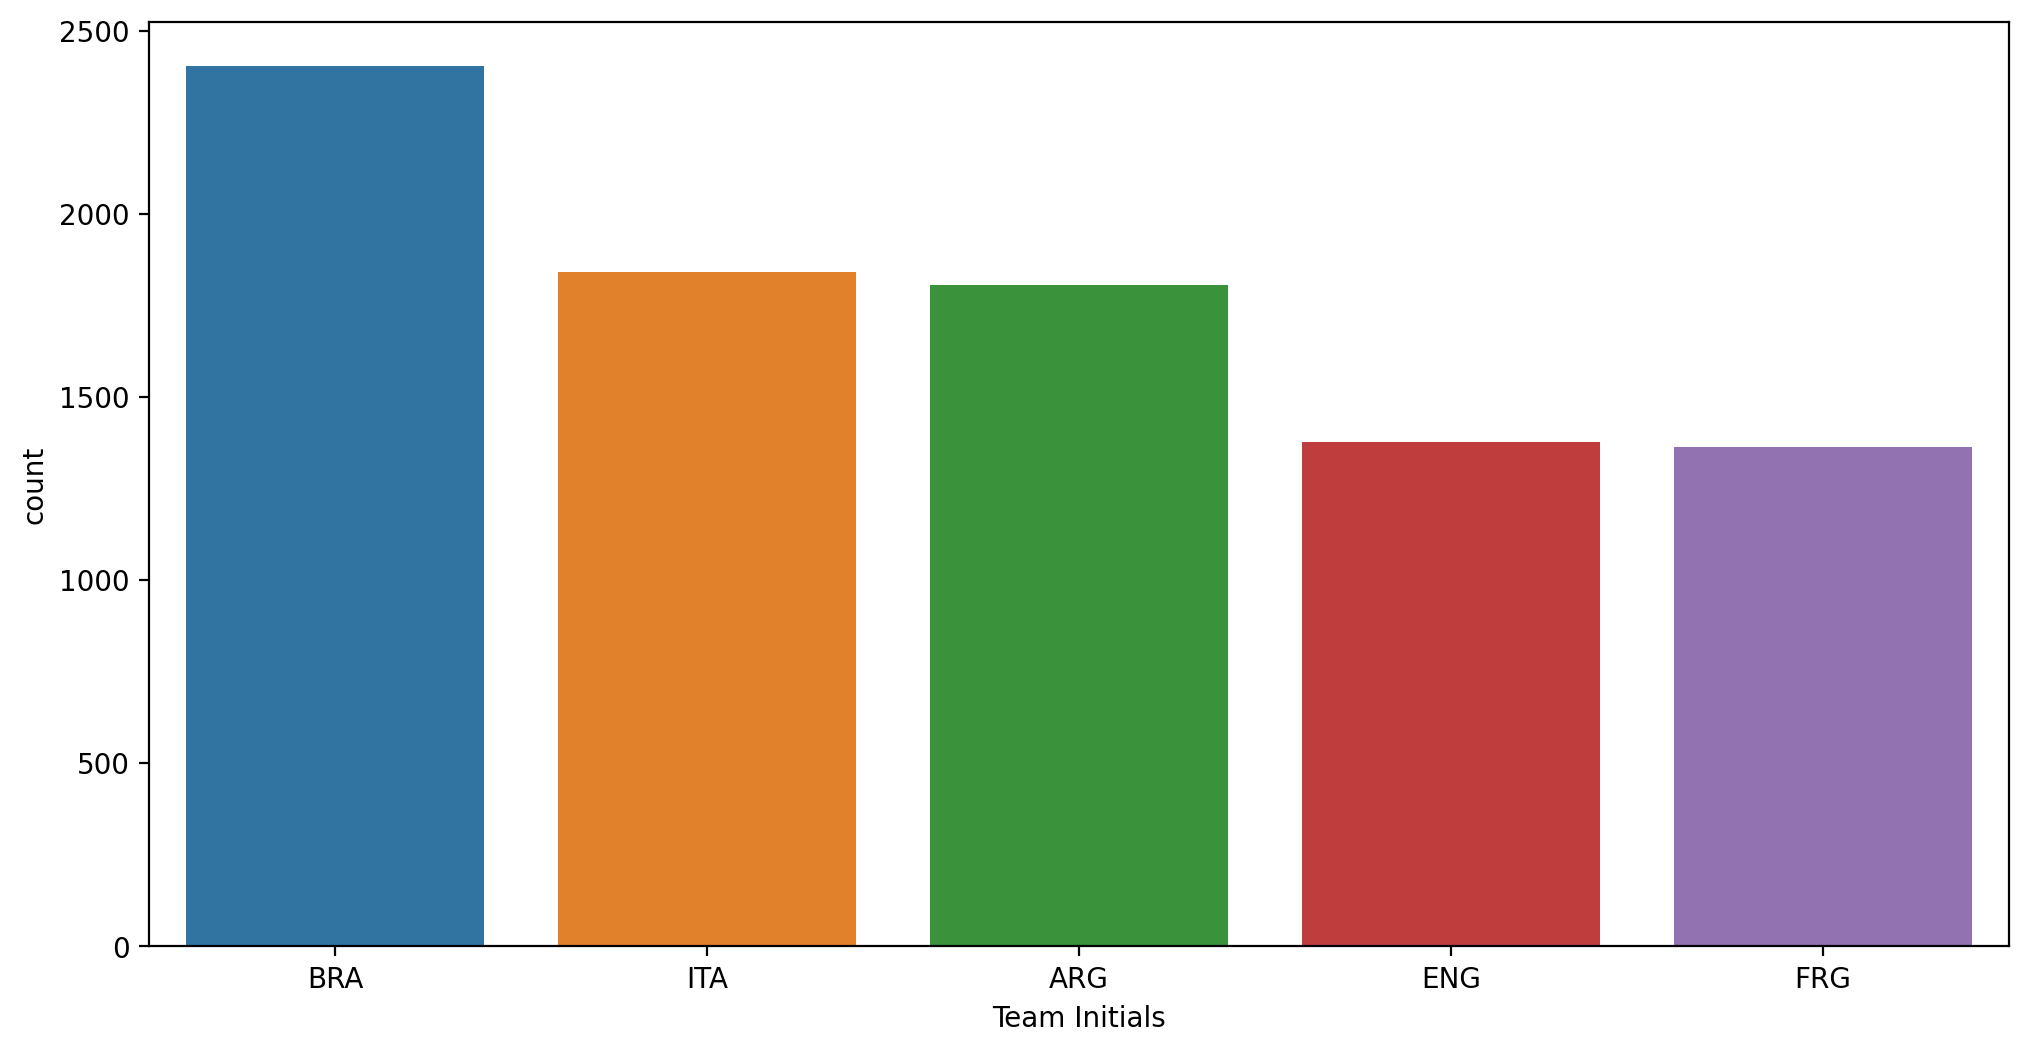

In [105]:
n1 = df3['Team Initials'].value_counts().nlargest(5)
plt.figure(figsize=(12, 6), dpi=200)
sns.countplot(data=df3, x='Team Initials', order=n1.index)
plt.show()


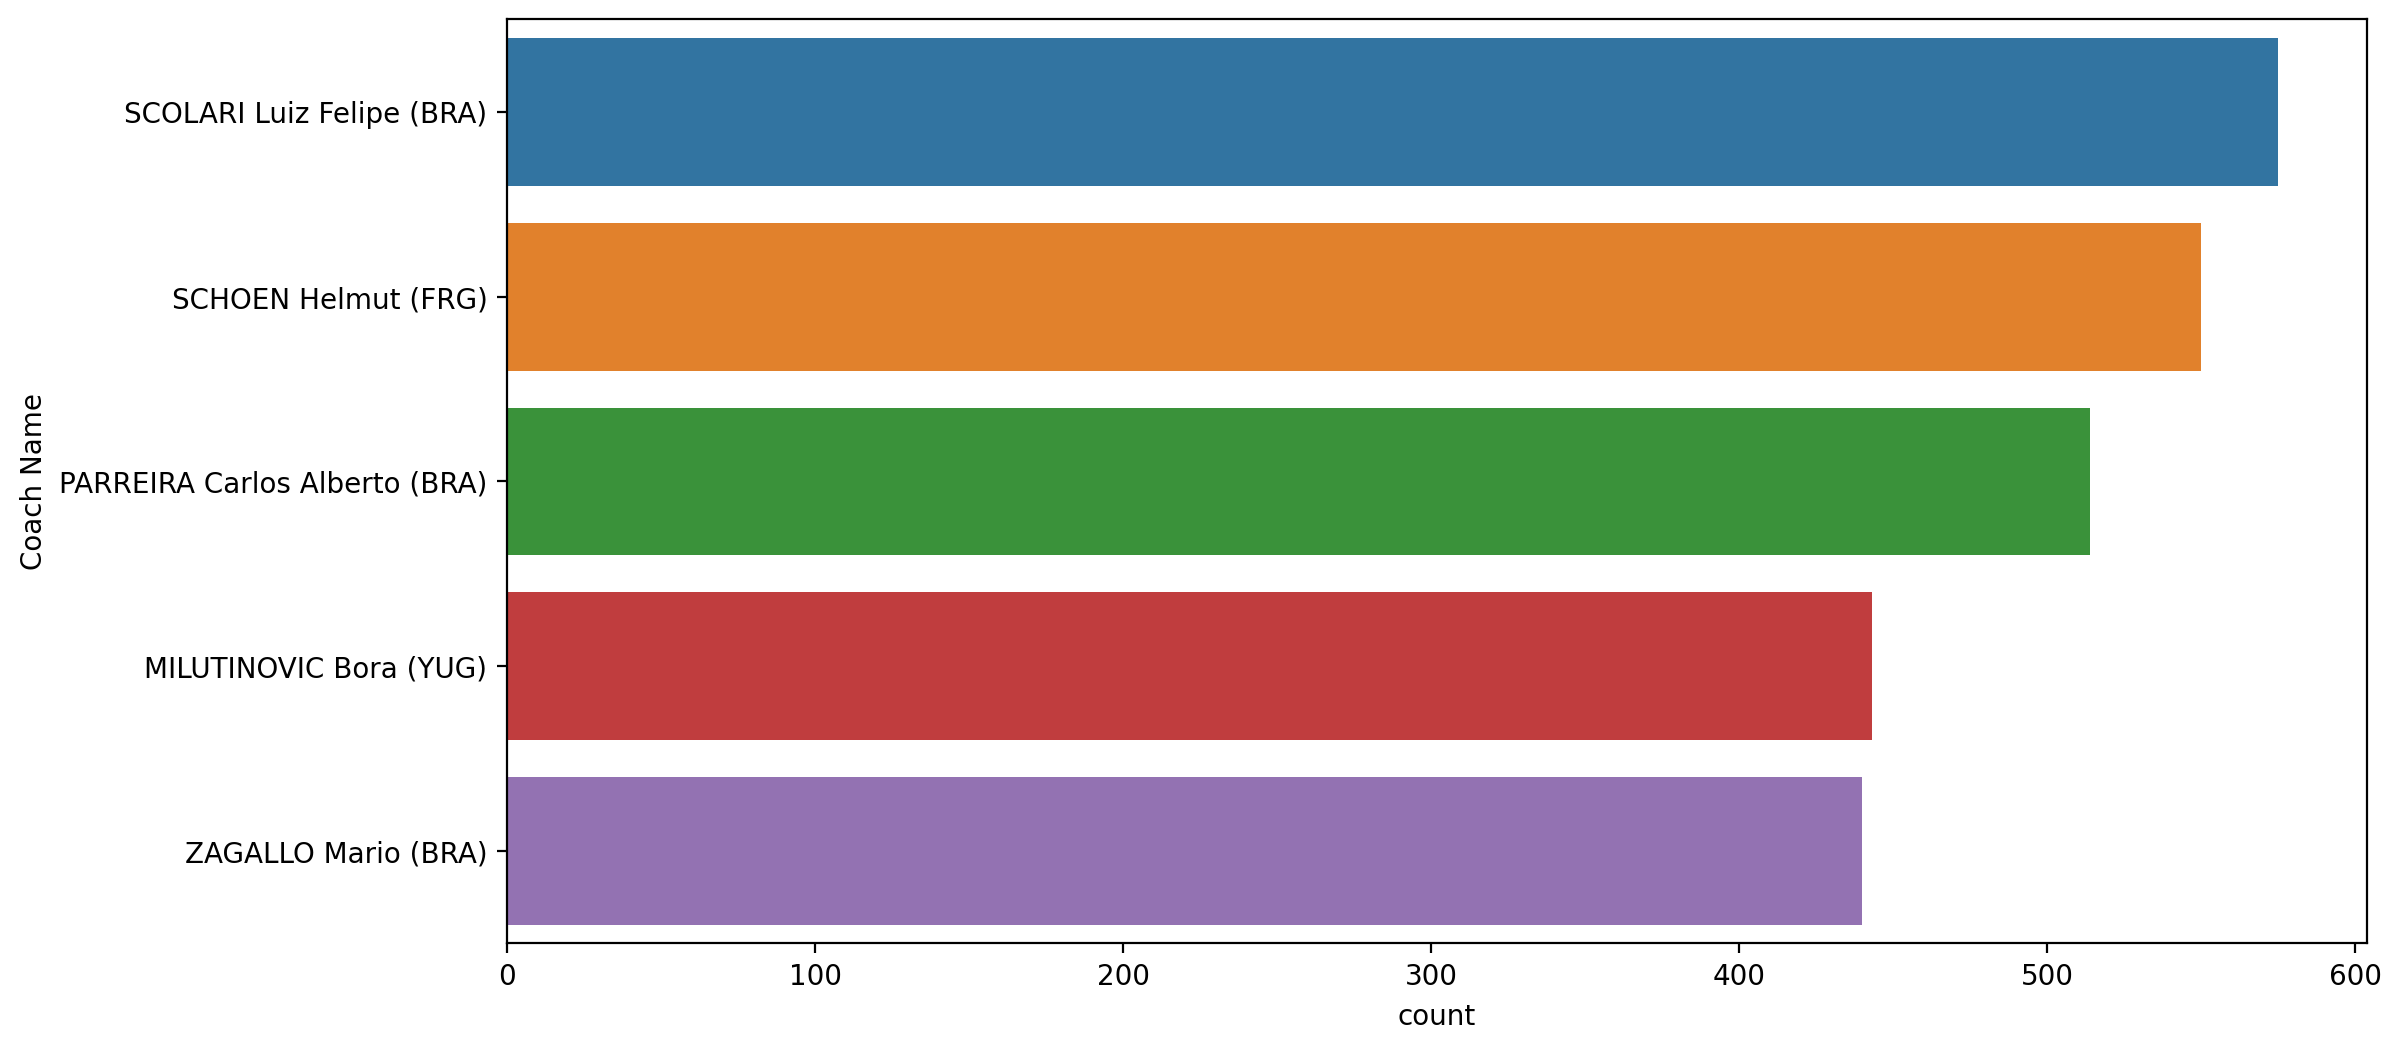

In [107]:
n3 = df3['Coach Name'].value_counts().nlargest(5)
plt.figure(figsize=(12, 6), dpi=200)
sns.countplot(data=df3, y='Coach Name', order=n3.index)
plt.show()


In [115]:
df3['Line-up'].unique()

array(['S', 'N'], dtype=object)

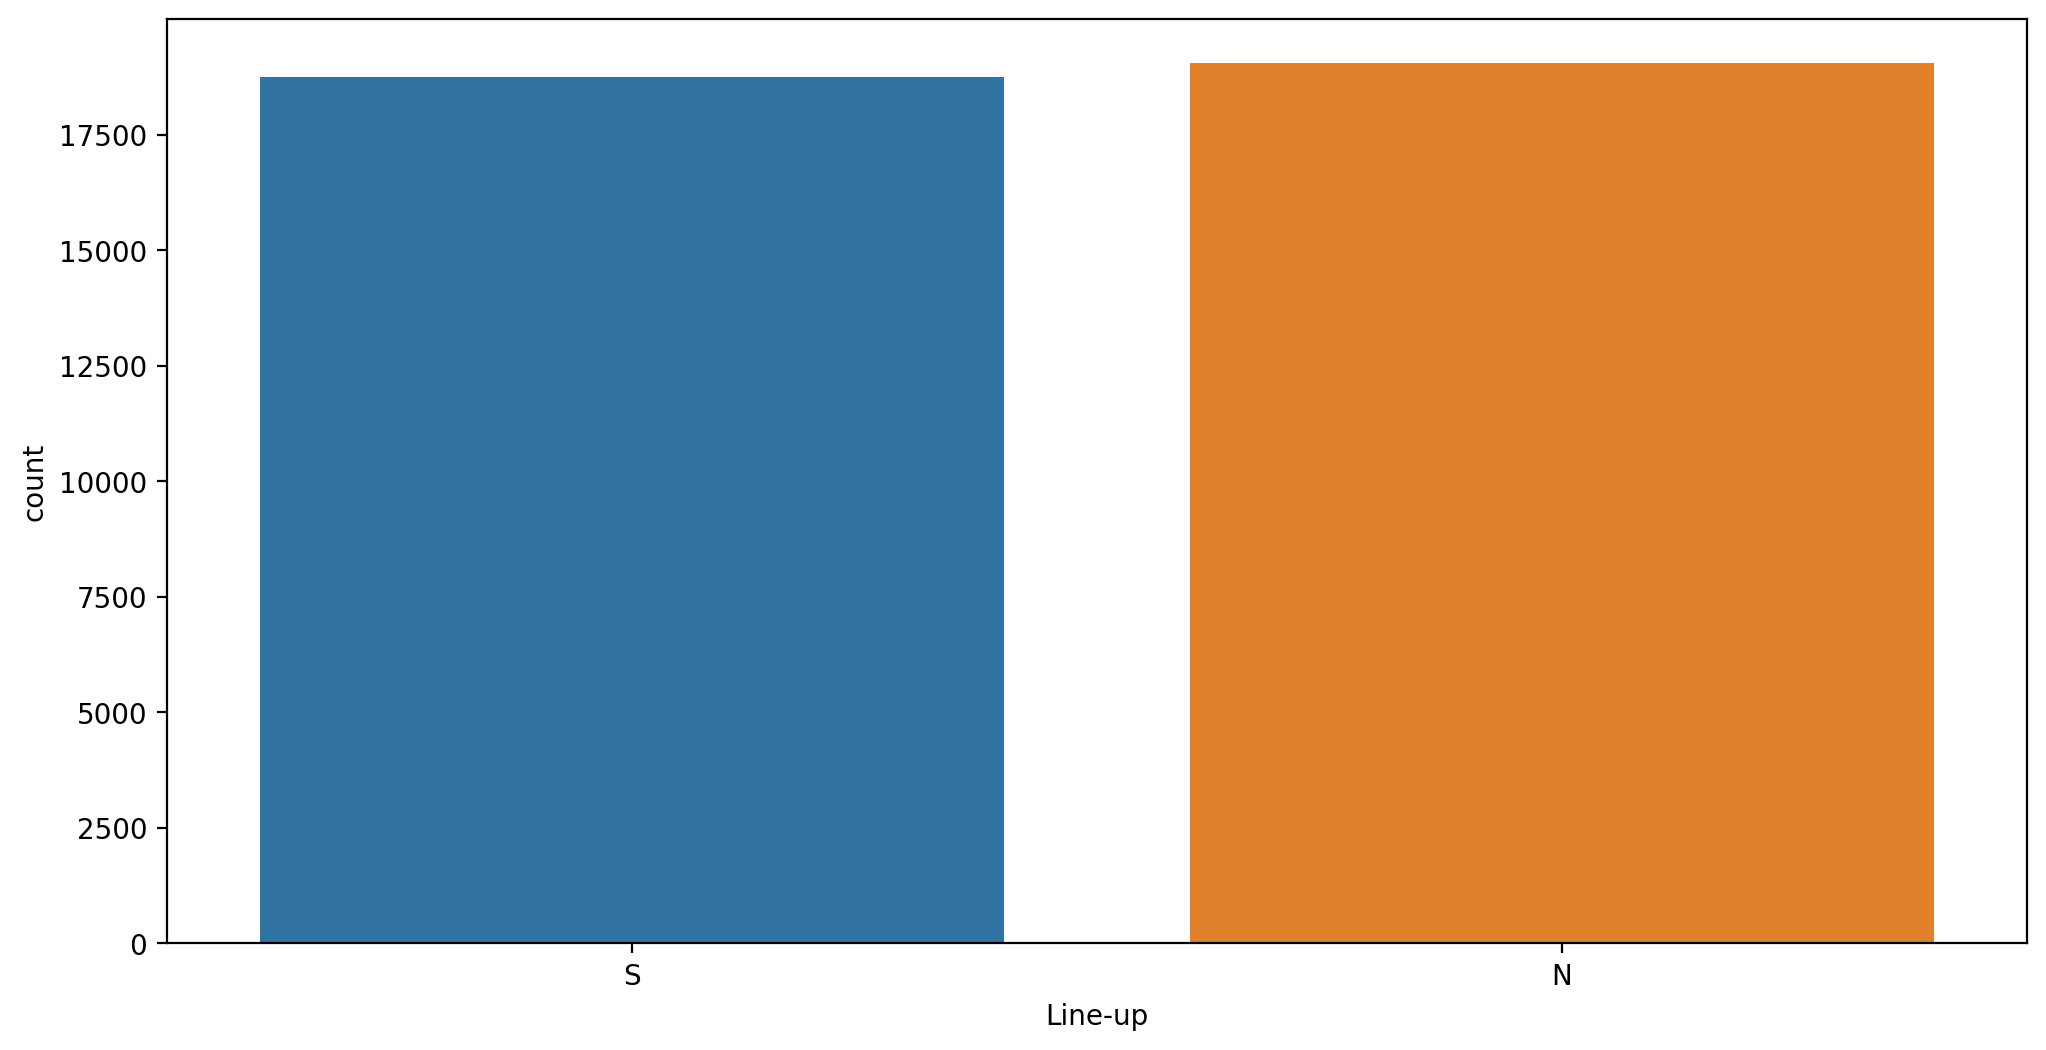

In [119]:
plt.figure(figsize=(12, 6), dpi=200)
sns.countplot('Line-up',data=df3)
plt.show()


In [122]:
df3['Line-up'].value_counts()

N    19040
S    18744
Name: Line-up, dtype: int64

In [129]:
tot=df3['Line-up'].value_counts().sum()
df3['Line-up'].value_counts()[0]
df3['Line-up'].value_counts()[1]
per1 =(df3['Line-up'].value_counts()[0])/tot*100
per2 =(df3['Line-up'].value_counts()[1])/tot*100


In [131]:
print("percentage of N line up is {:.2f}%".format(per1) )
print("percentage of S line up is {:.2f}%".format(per2) )

percentage of N line up is 50.39%
percentage of S line up is 49.61%


<h1><center>THANK YOU!</center></h1>
